# Tm Prediction Comparisons

In [1]:
### Initialize seed for reproducibility
import numpy as np
np.random.seed(0)
import math

### Data Wrangling and Plots
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
import keras

In [2]:
#data = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_650M.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_3B.csv", header=None)
data = pd.read_csv("./tm_predictors/tm_dataset_ESM_15B.csv", header=None)
data.head()

0         1         2         3         4         5         6     \
0  0.004451 -0.026736 -0.000681 -0.036856 -0.112569  0.052918  0.034112   
1 -0.004392 -0.049151  0.028632 -0.031678 -0.106301  0.064784  0.037541   
2 -0.026782 -0.012829  0.020543 -0.040270 -0.092556  0.008233  0.021450   
3 -0.026038 -0.033876  0.052316 -0.035356 -0.085919  0.020241  0.020386   
4 -0.011584 -0.002739 -0.000718 -0.064319 -0.044984  0.027685  0.030403   

       7         8         9     ...      5110      5111      5112      5113  \
0  0.069336  0.041242 -0.084181  ... -0.063513  0.160511  0.017313 -0.130935   
1  0.065528  0.054021 -0.020974  ... -0.075691  0.175937  0.031647 -0.097111   
2  0.119111  0.037800 -0.079169  ... -0.029368  0.129198  0.027107 -0.101219   
3  0.115664  0.031752 -0.032354  ... -0.037434  0.148046  0.037963 -0.056533   
4  0.116130  0.075513 -0.086494  ...  0.021375  0.108914  0.081281 -0.100116   

       5114      5115      5116      5117      5118      5119  
0  0.016956  0.063607 -0.015622 -0.000625 -0.050451  0.048337  
1  0.014959  0.026592  0.013965 -0.015340 -0.071479  0.072360  
2 -0.024505  0.012899 -0.035465 -0.023821 -0.097226  0.050777  
3 -0.020794 -0.006809 -0.001360 -0.046397 -0.112732  0.085475  
4 -0.104530  0.032080  0.026306 -0.048092 -0.049530  0.067671  

[5 rows x 5120 columns]

In [3]:
y = pd.read_excel("sdab_data.xlsx")
y = y.tm
x = data

# assign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# check assignments - y should be Tms only
print(x)
print(y)

         0         1         2         3         4         5         6     \
0    0.004451 -0.026736 -0.000681 -0.036856 -0.112569  0.052918  0.034112   
1   -0.004392 -0.049151  0.028632 -0.031678 -0.106301  0.064784  0.037541   
2   -0.026782 -0.012829  0.020543 -0.040270 -0.092556  0.008233  0.021450   
3   -0.026038 -0.033876  0.052316 -0.035356 -0.085919  0.020241  0.020386   
4   -0.011584 -0.002739 -0.000718 -0.064319 -0.044984  0.027685  0.030403   
..        ...       ...       ...       ...       ...       ...       ...   
562  0.017933  0.030289 -0.027982 -0.039387 -0.062664  0.020131  0.032588   
563 -0.024302 -0.005895 -0.026037 -0.025555 -0.014472 -0.006766  0.041264   
564 -0.031473 -0.031347 -0.057759 -0.013305 -0.036420 -0.007608  0.049189   
565  0.016669  0.010753 -0.002518 -0.047222 -0.042344 -0.002325  0.054203   
566 -0.037161 -0.015003  0.001932 -0.017188 -0.043752 -0.008229  0.018025   

         7         8         9     ...      5110      5111      5112  \
0  

### Load the best-performing model

In [4]:
model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_15B.keras")

In [5]:
mae = mean_absolute_error(y_test, model.predict(x_test))
rmse = math.sqrt(mean_squared_error(y_test, model.predict(x_test)))
coeff_det=r2_score(y_test, model.predict(x_test))

print(mae, rmse, coeff_det)

4/4 [==============================] - 0s 2ms/step
4.030848267044442 5.661301706373775 0.7137665668159021


In [7]:
#nanobody_predictions = pd.DataFrame(model.predict(x))
#nanobody_predictions
#nanobody_predictions.to_csv(\"TEMPRO_TmPreds.csv\", header=None)

## Compare Tms from other sources

In [2]:
tm_comparisons = pd.read_csv("./tm_comparison_datasets/all_tm_comparisons.csv")
tm_comparisons

id          name  Actual_Tm     TEMPRO    ProTDet  DeepStabP_Cell37  \
0      sdab1      NRL-N-C2       67.5  68.172410  51.995130         54.784729   
1      sdab2  NRL-N-C2-hop       65.0  65.598465  51.983513         54.160854   
2      sdab3      NRL-N-E2       62.0  64.533890  52.293830         53.637676   
3      sdab4  NRL-N-E2-hop       62.0  62.813786  52.310158         52.468925   
4      sdab5     NRL-N-E10       70.0  71.235620  52.305046         51.909128   
..       ...           ...        ...        ...        ...               ...   
562  sdab563            F8       59.0  59.100796  52.282500         56.100160   
563  sdab564            D1       49.0  49.882230  52.272840         52.902846   
564  sdab565           F11       54.0  54.644543  52.174126         53.671536   
565  sdab566           H1W       71.0  69.484314  52.032063         54.003676   
566  sdab567           C10       66.0  67.031100  52.049816         54.530517   

     DeepStabP_Lysate37  DeepStabP_Lysate22  
0             55.583185           55.945881  
1             54.650911           54.055810  
2             54.985965           55.412668  
3             53.243382           52.691291  
4             53.413302           54.142093  
..                  ...                 ...  
562           56.039573           58.057249  
563           53.462033           53.663213  
564           54.518096           55.143738  
565           54.751416           54.679577  
566           56.267654           57.271032  

[567 rows x 8 columns]

In [3]:
tm_groupings = tm_comparisons.iloc[:,-6:]
tm_groupings

Actual_Tm     TEMPRO    ProTDet  DeepStabP_Cell37  DeepStabP_Lysate37  \
0         67.5  68.172410  51.995130         54.784729           55.583185   
1         65.0  65.598465  51.983513         54.160854           54.650911   
2         62.0  64.533890  52.293830         53.637676           54.985965   
3         62.0  62.813786  52.310158         52.468925           53.243382   
4         70.0  71.235620  52.305046         51.909128           53.413302   
..         ...        ...        ...               ...                 ...   
562       59.0  59.100796  52.282500         56.100160           56.039573   
563       49.0  49.882230  52.272840         52.902846           53.462033   
564       54.0  54.644543  52.174126         53.671536           54.518096   
565       71.0  69.484314  52.032063         54.003676           54.751416   
566       66.0  67.031100  52.049816         54.530517           56.267654   

     DeepStabP_Lysate22  
0             55.945881  
1             54.055810  
2             55.412668  
3             52.691291  
4             54.142093  
..                  ...  
562           58.057249  
563           53.663213  
564           55.143738  
565           54.679577  
566           57.271032  

[567 rows x 6 columns]

In [4]:
df_comparisons = tm_groupings.melt(var_name="groups", value_name="vals")
df_comparisons

groups       vals
0              Actual_Tm  67.500000
1              Actual_Tm  65.000000
2              Actual_Tm  62.000000
3              Actual_Tm  62.000000
4              Actual_Tm  70.000000
...                  ...        ...
3397  DeepStabP_Lysate22  58.057249
3398  DeepStabP_Lysate22  53.663213
3399  DeepStabP_Lysate22  55.143738
3400  DeepStabP_Lysate22  54.679577
3401  DeepStabP_Lysate22  57.271032

[3402 rows x 2 columns]

C:\Users\jalvarez\AppData\Local\Temp\2\ipykernel_20628\1304692243.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  tms.set_yticklabels(tms.get_yticklabels(), rotation=0, fontsize=14)


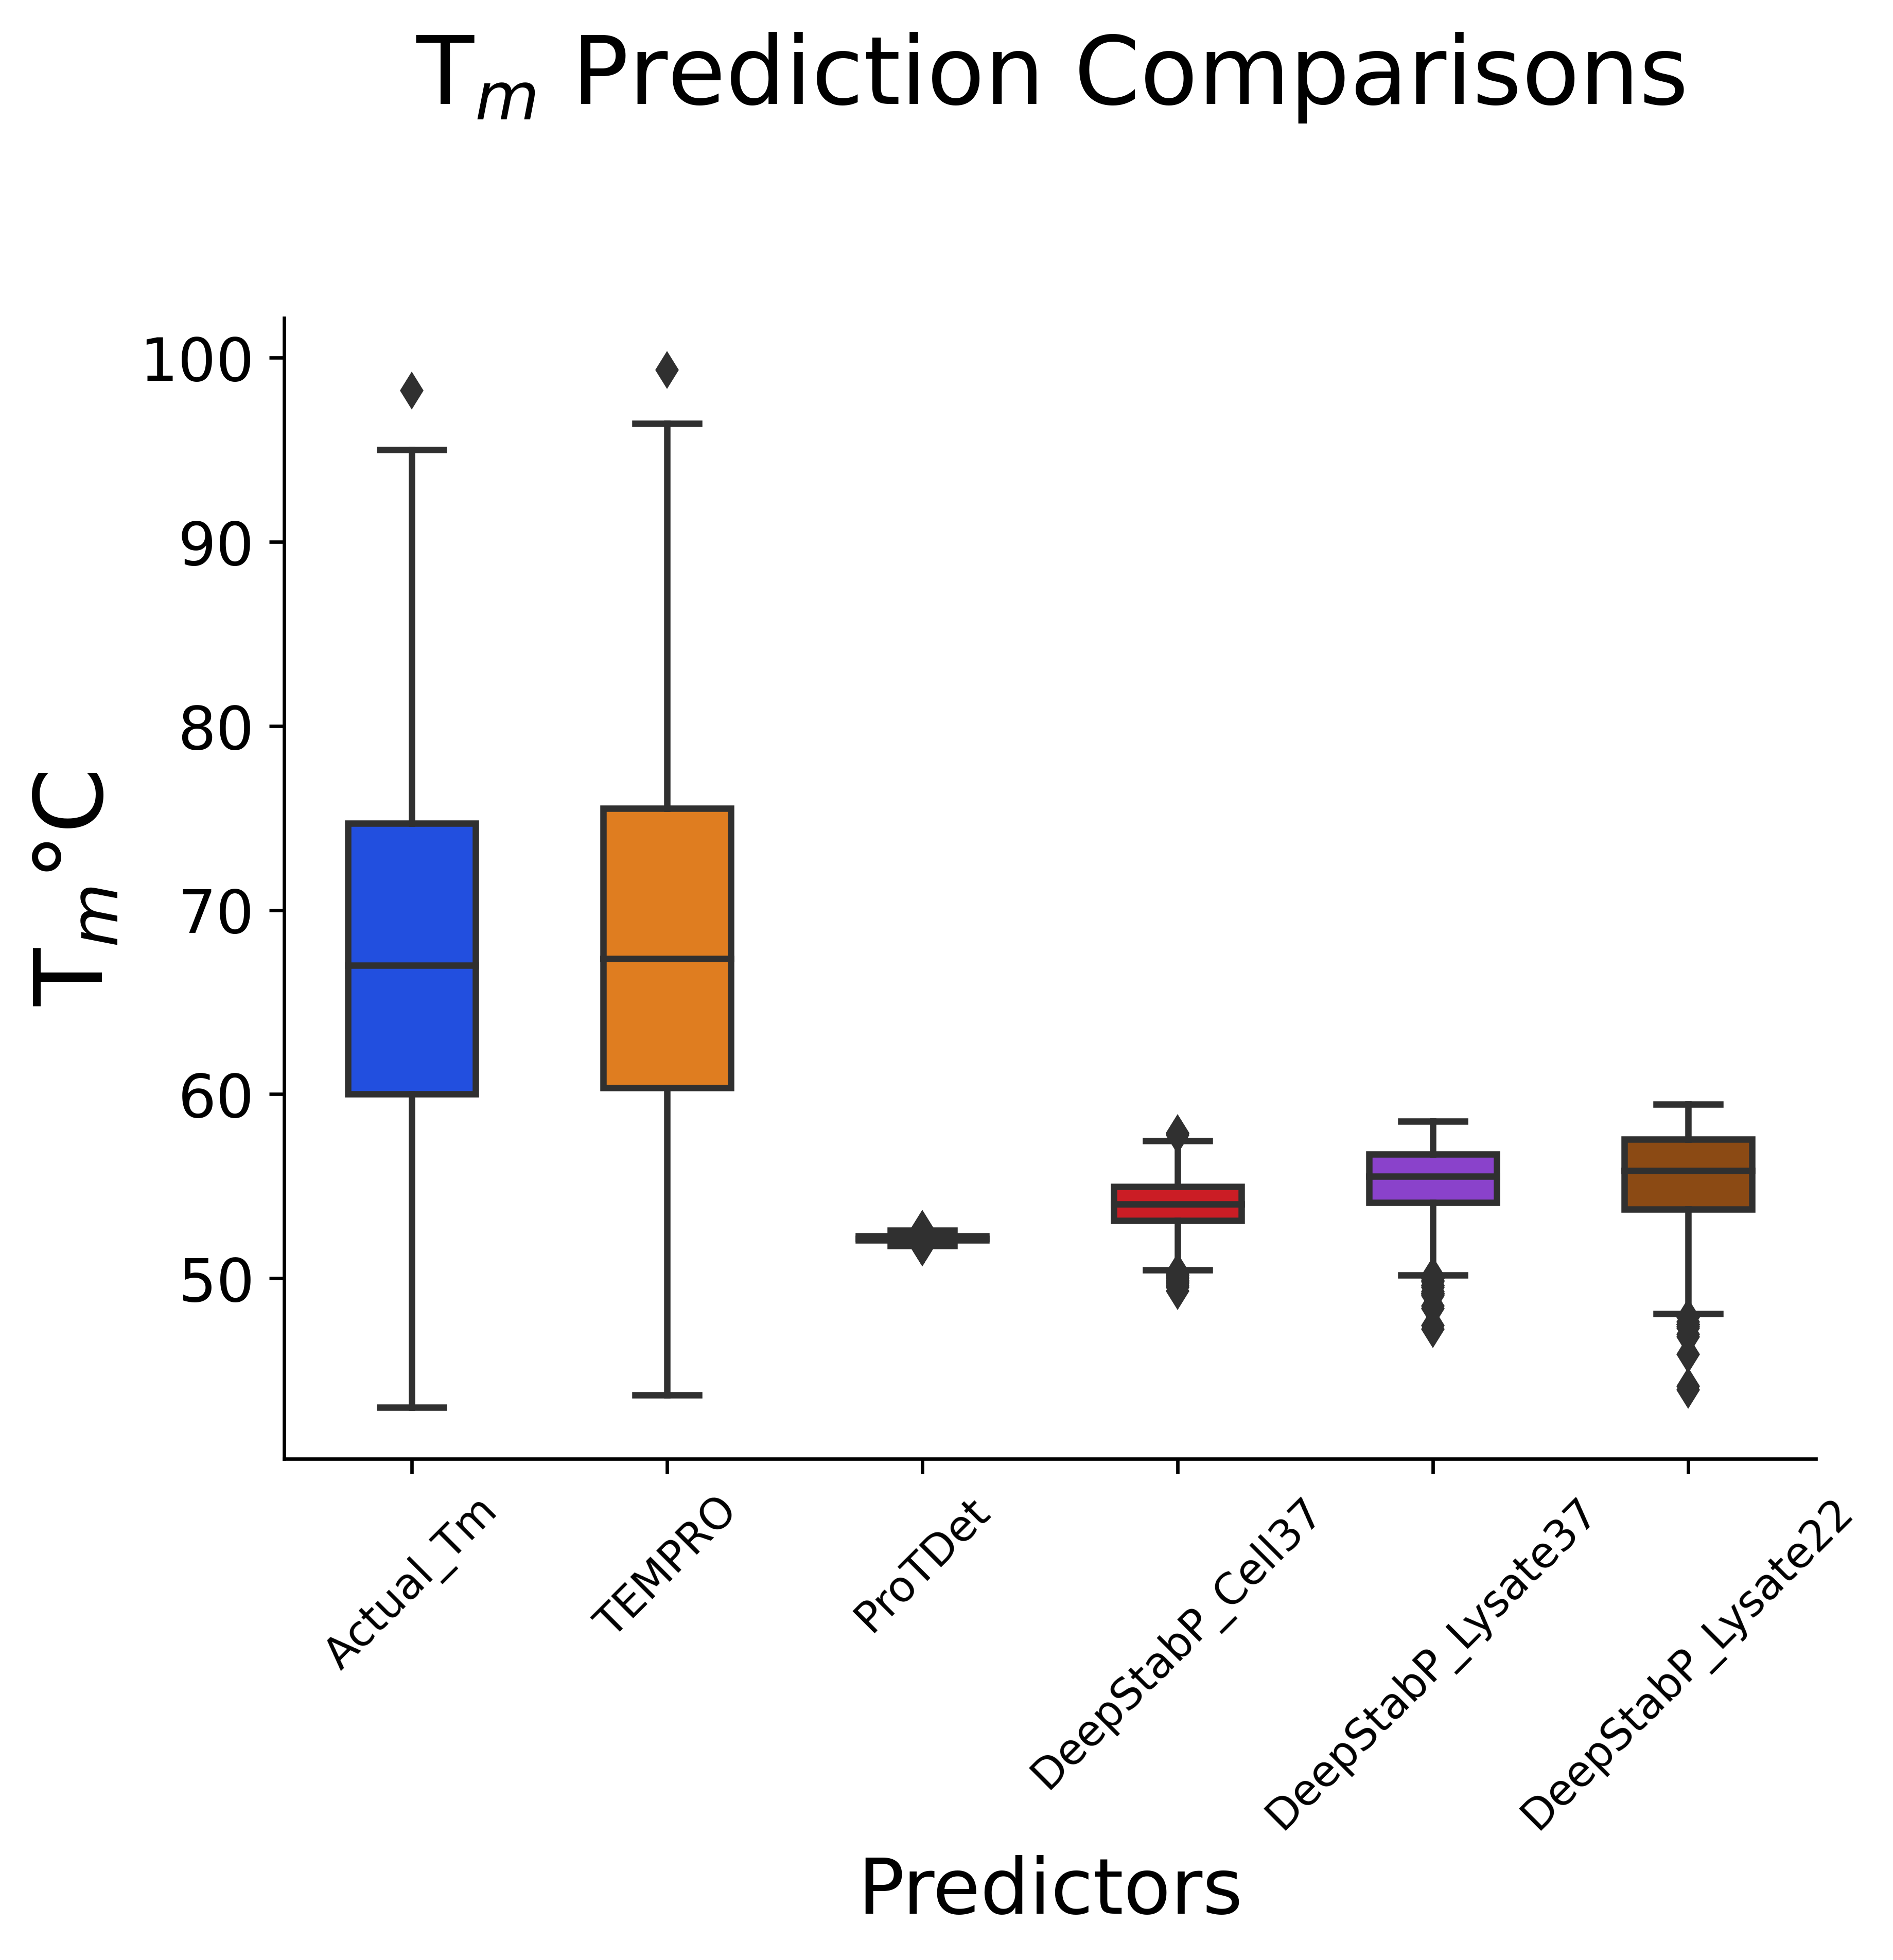

In [6]:
tms = sns.boxplot(x="groups", y="vals", data=df_comparisons, palette="bright", width=0.5)
tms.set_xticklabels(tms.get_xticklabels(), rotation=45, fontsize=10)
tms.set_yticklabels(tms.get_yticklabels(), rotation=0, fontsize=14)
tms.set_xlabel("Predictors", fontsize=18)
tms.set_ylabel("T$_m$°C", fontsize=22)
tms.set_title("T$_m$ Prediction Comparisons", fontsize=22, pad=50)

sns.despine()

In [48]:
tm_groupings.head()

actual_tm     TEMPRO    ProTDet  DeepStabP_Cell37  DeepStabP_Lysate37  \
0       67.5  68.172410  51.995130         54.784729           55.583185   
1       65.0  65.598465  51.983513         54.160854           54.650911   
2       62.0  64.533890  52.293830         53.637676           54.985965   
3       62.0  62.813786  52.310158         52.468925           53.243382   
4       70.0  71.235620  52.305046         51.909128           53.413302   

   DeepStabP_Lysate22  
0           55.945881  
1           54.055810  
2           55.412668  
3           52.691291  
4           54.142093

In [61]:
compare_mae = mean_absolute_error(tm_groupings.actual_tm, 
                                  #tm_groupings.TEMPRO)
                                  #tm_groupings.ProTDet)
                                  #tm_groupings.DeepStabP_Cell37)
                                  #tm_groupings.DeepStabP_Lysate37)
                                  tm_groupings.DeepStabP_Lysate22)


compare_rmse = math.sqrt(mean_squared_error(tm_groupings.actual_tm, 
                                            #tm_groupings.TEMPRO))
                                            #tm_groupings.ProTDet))
                                            #tm_groupings.DeepStabP_Cell37))
                                            #tm_groupings.DeepStabP_Lysate37))
                                            tm_groupings.DeepStabP_Lysate22))


print(compare_mae, compare_rmse)

12.81896206786596 15.258175221287328


## Model Prediction Comparisons

C:\Users\jalvarez\AppData\Local\Temp\2\ipykernel_20628\3523887422.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  tms.set_yticklabels(tms.get_yticklabels(), rotation=0, fontsize=16)


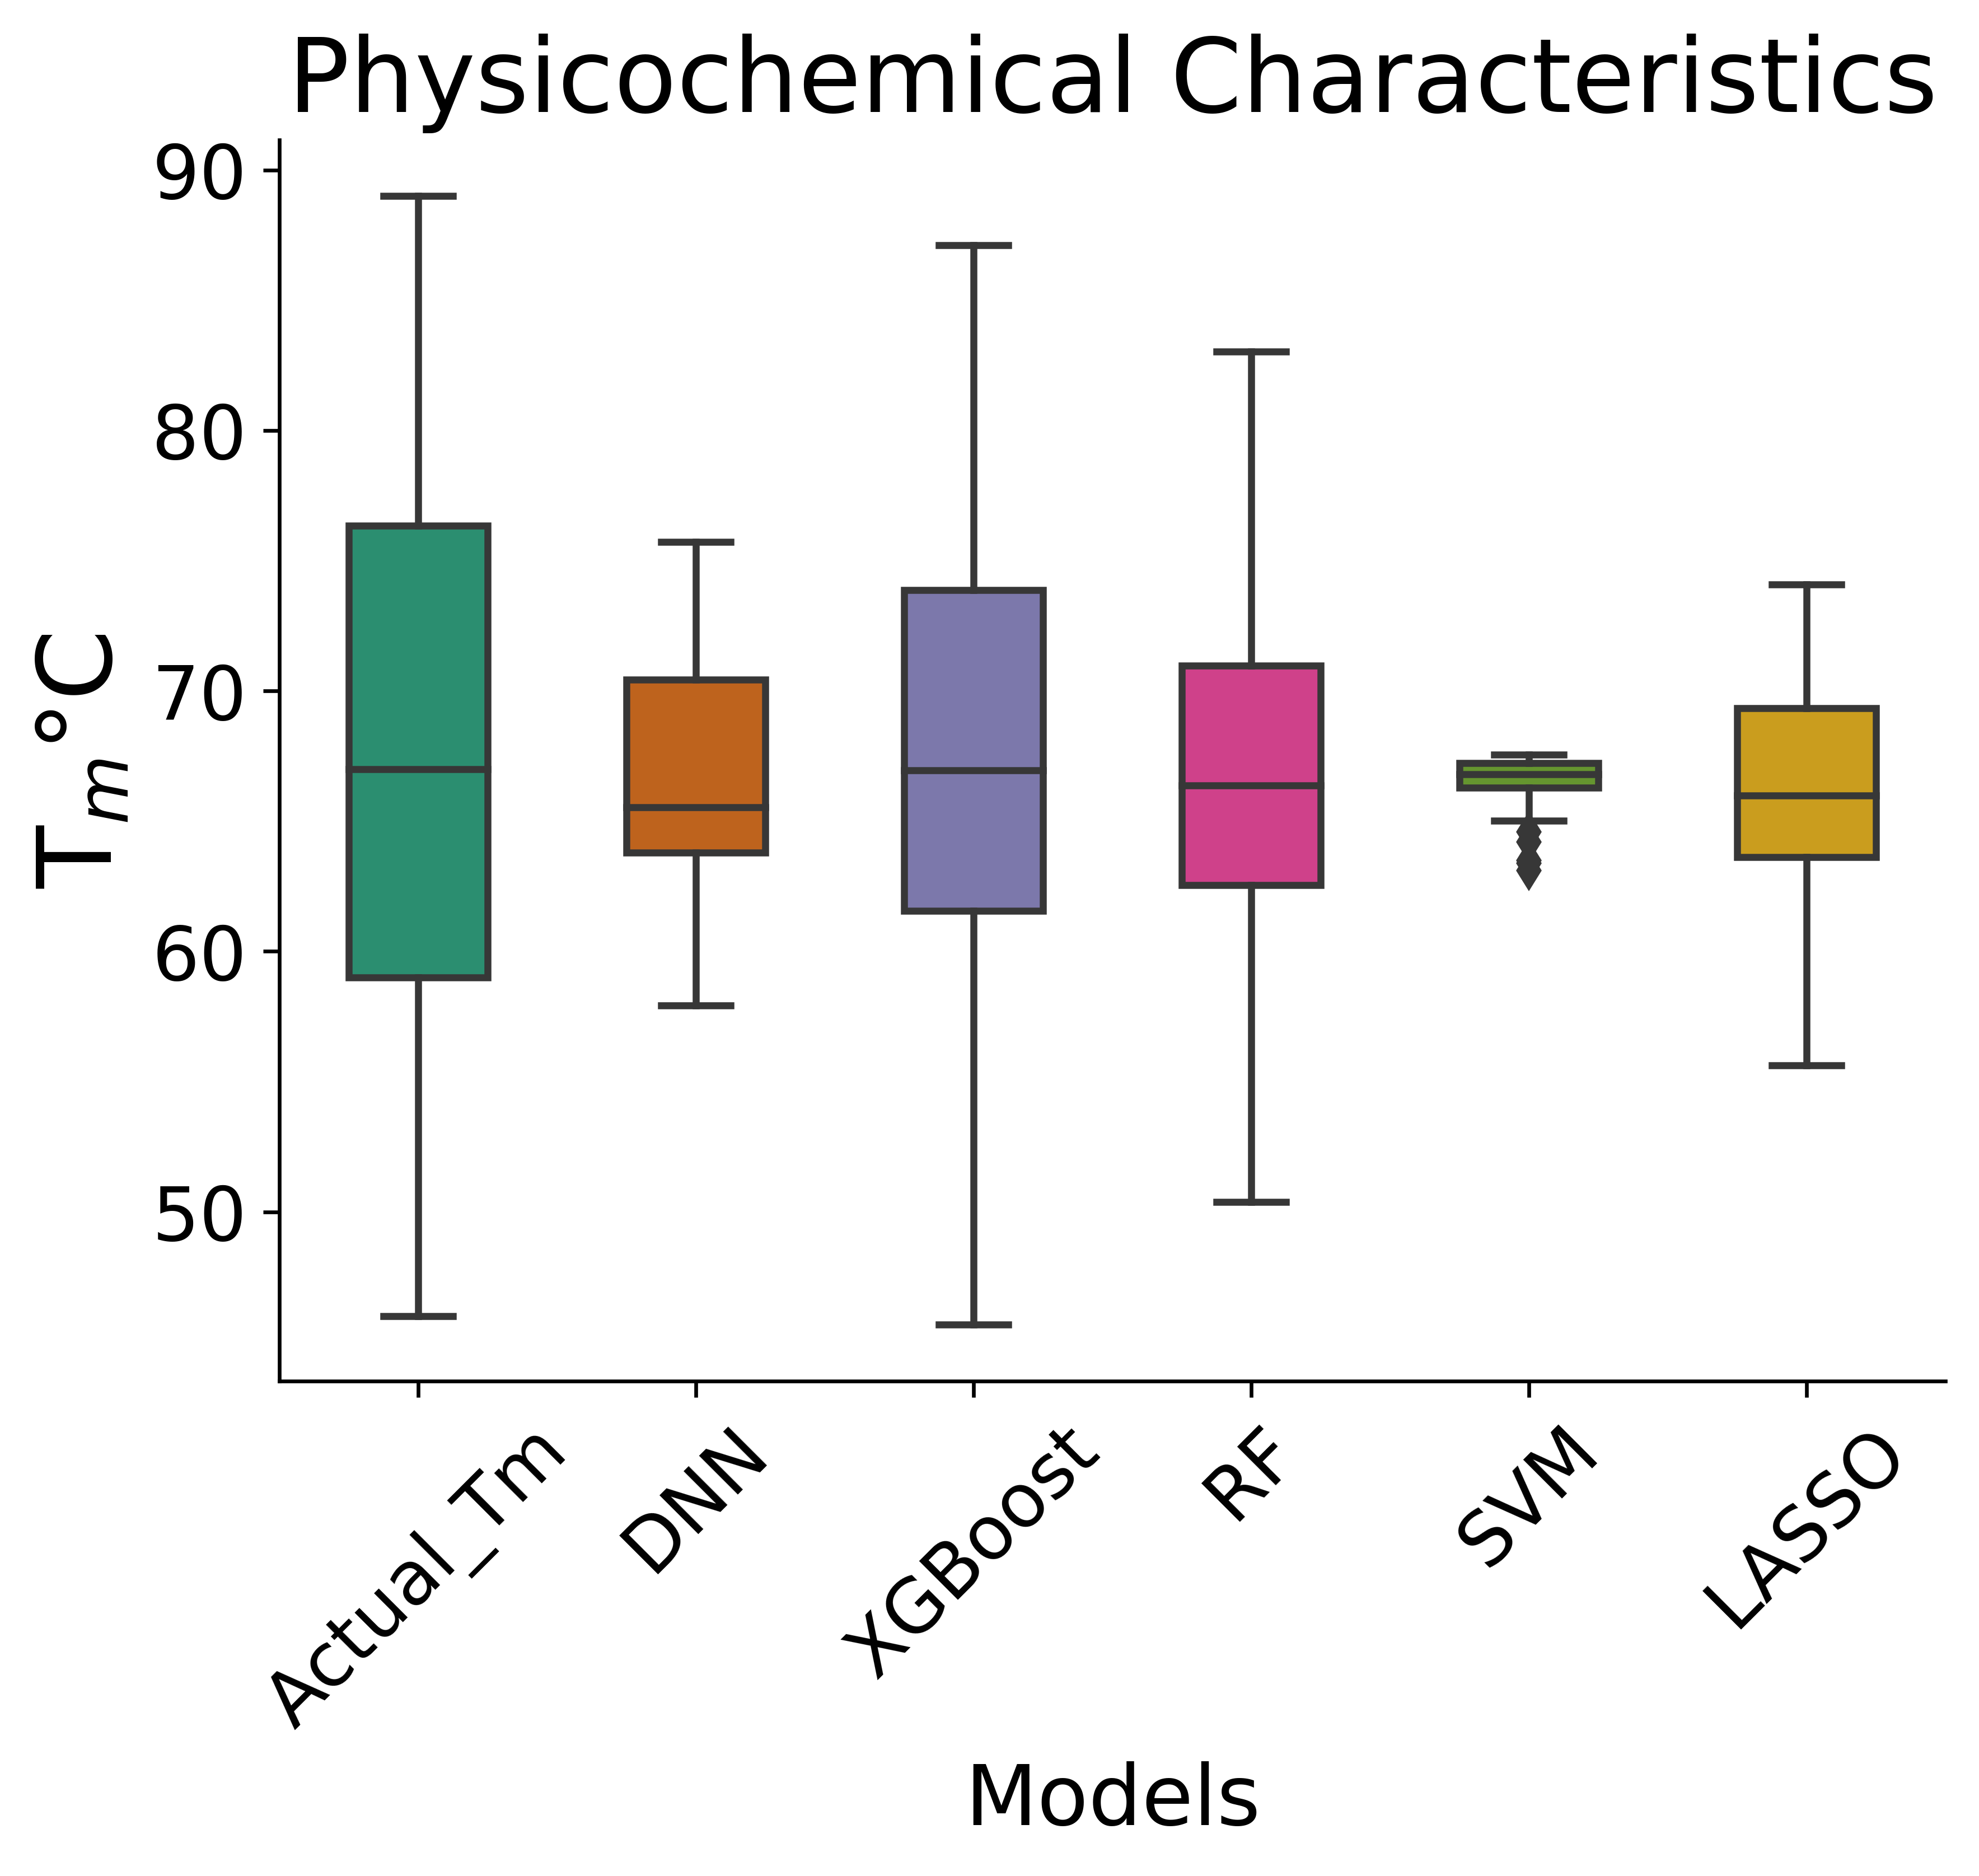

In [8]:
tm_predictions = pd.read_excel("./tm_predictions/all_models_PCHARS_MAESTRO.xlsx")
#tm_predictions = pd.read_excel("./tm_predictions/all_models_NSP3.xlsx")
#tm_predictions = pd.read_excel("./tm_predictions/all_models_AF2.xlsx")
#tm_predictions = pd.read_excel("./tm_predictions/all_models_ESM650M.xlsx")
#tm_predictions = pd.read_excel("./tm_predictions/all_models_ESM3B.xlsx")
#tm_predictions = pd.read_excel("./tm_predictions/all_models_ESM15B.xlsx")
#tm_predictions.head()

pred_comparisons = tm_predictions.melt(var_name="groups", value_name="vals")
#pred_comparisons

tms = sns.boxplot(x="groups", y="vals", data=pred_comparisons, palette="Dark2", width=0.5)
tms.set_xticklabels(tms.get_xticklabels(), rotation=45, fontsize=16)
tms.set_yticklabels(tms.get_yticklabels(), rotation=0, fontsize=16)
tms.set_xlabel("Models", fontsize=18)
tms.set_ylabel("T$_m$°C", fontsize=22)
tms.set_title("Physicochemical Characteristics", fontsize=22)#, pad=75)
#tms.set_title("NetSurfP3", fontsize=22)#, pad=75)
#tms.set_title("AlphaFold2 pLDDT Scores", fontsize=22)#, pad=75)
#tms.set_title("ESM650M Embeddings", fontsize=22)#, pad=75)
#tms.set_title("ESM3B Embeddings", fontsize=22)#, pad=75)
#tms.set_title("ESM15B Embeddings", fontsize=22)#, pad=75)

sns.despine()

## DL and ML Diagnostics

In [171]:
dl_diagnostics = pd.read_excel("./tm_diagnostics/diagnostics_DL.xlsx")
dl_diagnostics.head()

Predictor  epoch    loss  mae_test   rmse     r2
0   ESM_15B    500  1.3674     4.297  5.851  0.694
1   ESM_15B   1000  1.0277     4.270  5.818  0.698
2   ESM_15B   1250  1.2646     4.201  5.800  0.700
3   ESM_15B   1500  0.8458     4.031  5.661  0.714
4   ESM_15B   1750  0.8125     4.398  5.995  0.679

C:\Users\jalvarez\AppData\Local\Temp\3\ipykernel_5308\3485005046.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dl_performance.set_yticklabels(dl_performance.get_yticklabels(), rotation=0, fontsize=16)


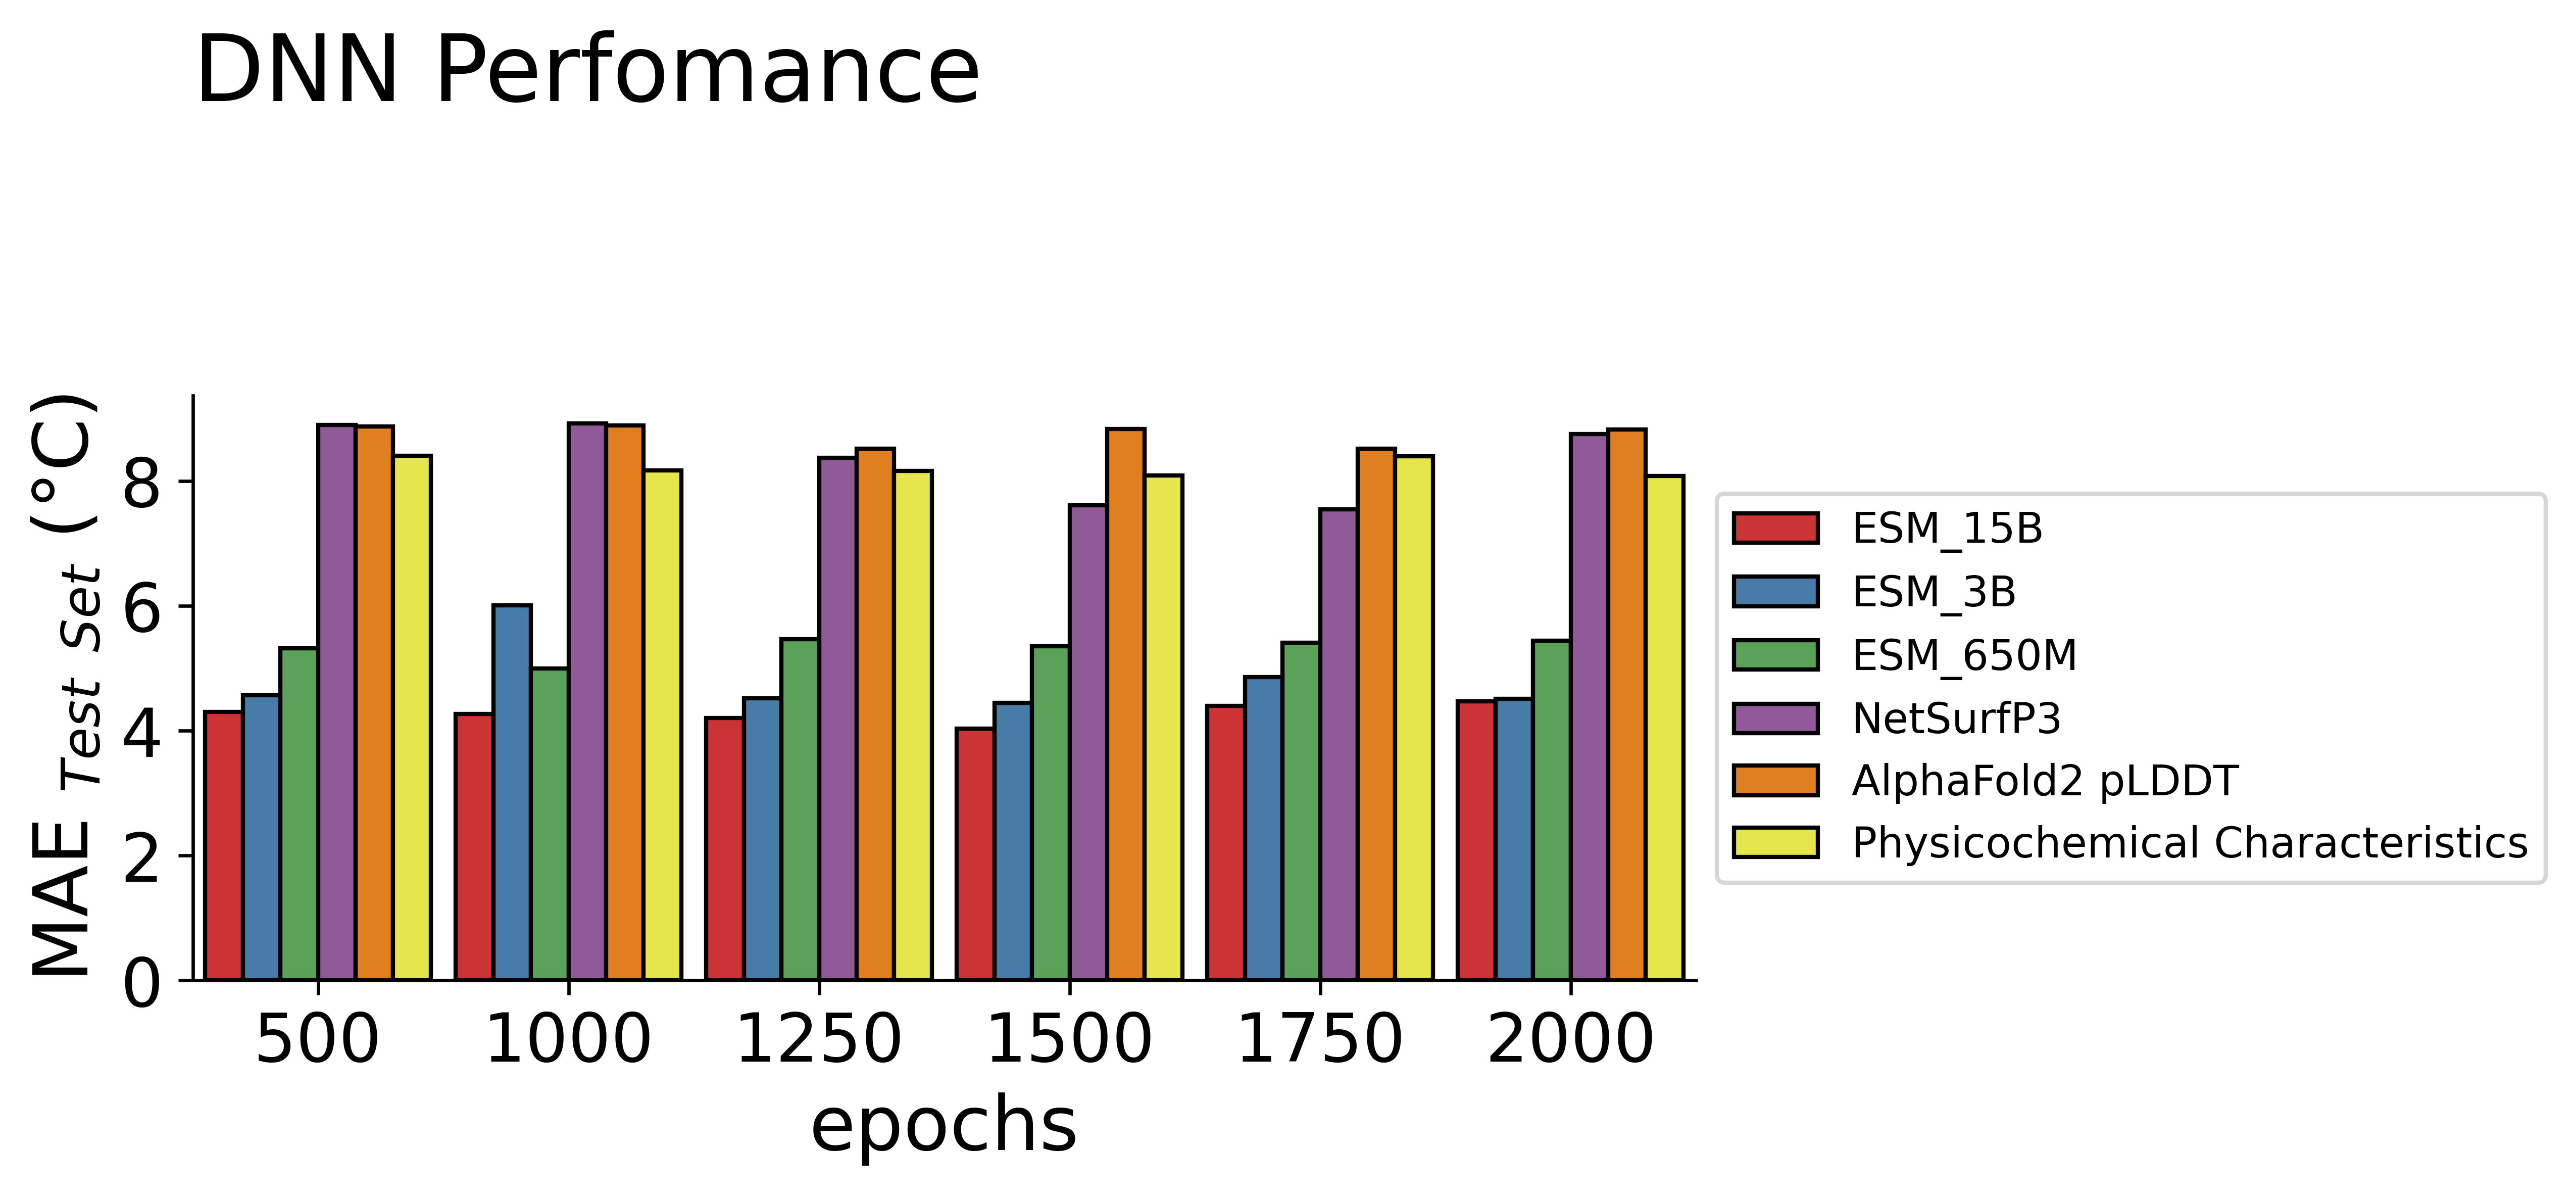

In [172]:
dl_performance = sns.barplot(data=dl_diagnostics, width=0.9,
                             x="epoch", y="mae_test", hue="Predictor",
                             palette="Set1", edgecolor="black")
dl_performance.set_xticklabels(dl_performance.get_xticklabels(), rotation=0, fontsize=16)
dl_performance.set_yticklabels(dl_performance.get_yticklabels(), rotation=0, fontsize=16)
dl_performance.set_xlabel("epochs", fontsize=18)
dl_performance.set_ylabel("MAE $_{Test}$ $_{Set}$ (°C)", fontsize=18)
dl_performance.set_title("DNN Perfomance", fontsize=22, pad=70, loc='left')
dl_performance.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#dl_performance.legend_.remove()
dl_performance.set_box_aspect(14/len(dl_performance.patches))

sns.despine()

C:\Users\jalvarez\AppData\Local\Temp\3\ipykernel_5308\4188658196.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dl_performance.set_yticklabels(dl_performance.get_yticklabels(), rotation=0, fontsize=16)


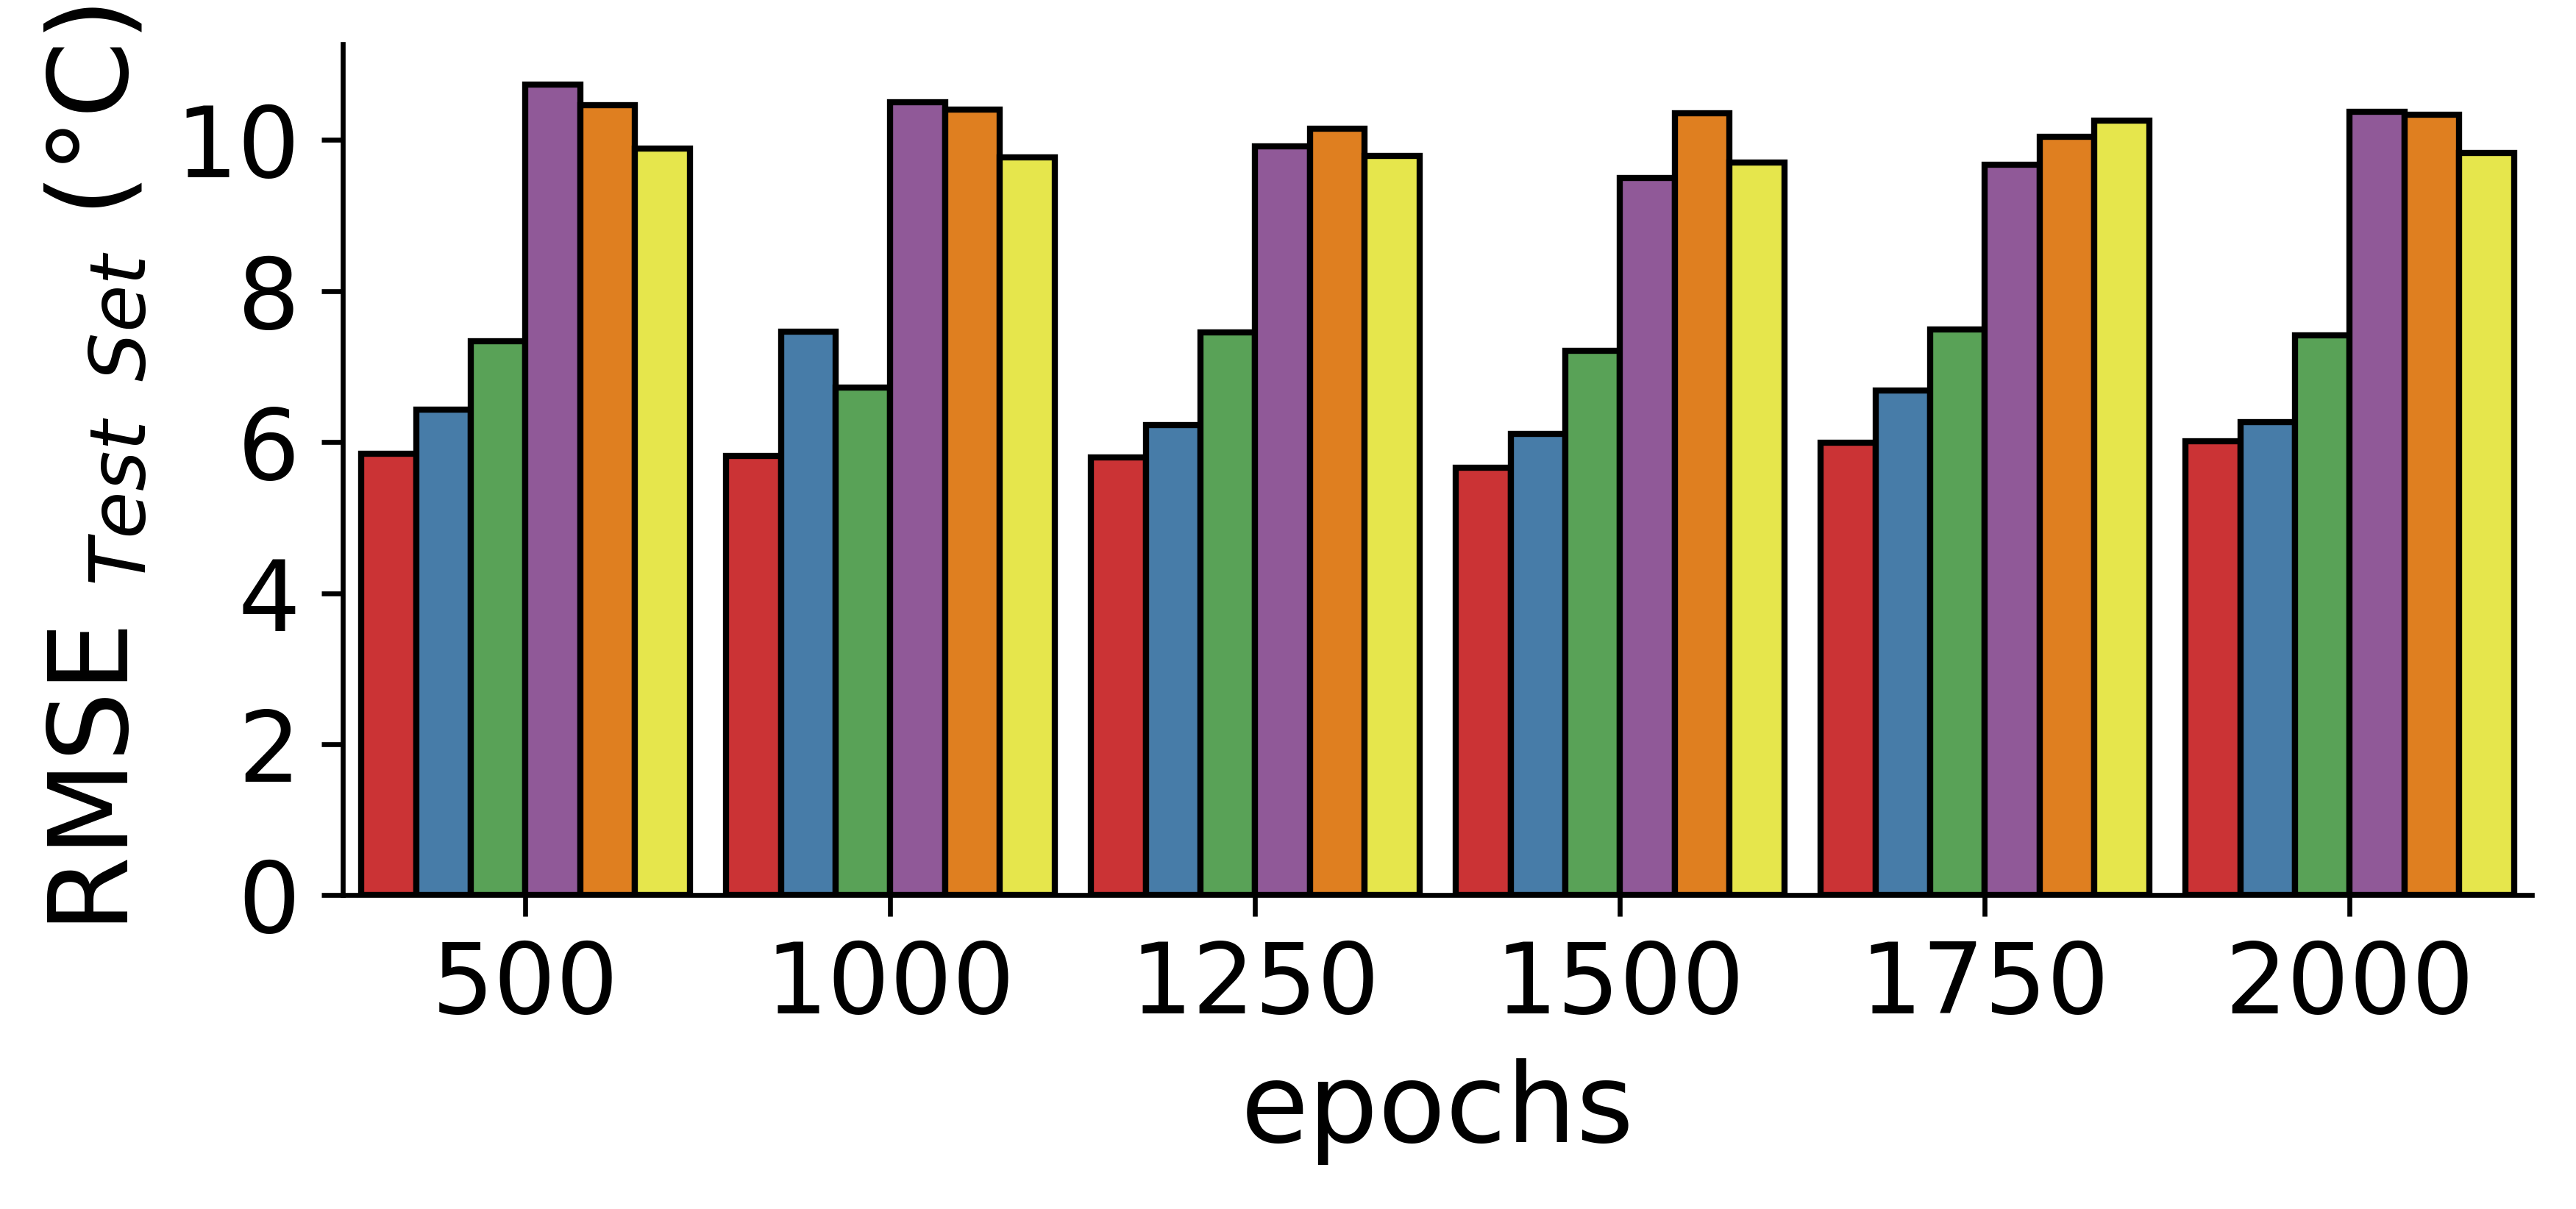

In [103]:
dl_performance = sns.barplot(data=dl_diagnostics, width=0.9,
                             x="epoch", y="rmse", hue="Predictor",
                             palette="Set1", edgecolor="black")
dl_performance.set_xticklabels(dl_performance.get_xticklabels(), rotation=0, fontsize=16)
dl_performance.set_yticklabels(dl_performance.get_yticklabels(), rotation=0, fontsize=16)
dl_performance.set_xlabel("epochs", fontsize=18)
dl_performance.set_ylabel("RMSE $_{Test}$ $_{Set}$ (°C)", fontsize=18)
dl_performance.legend_.remove()
dl_performance.set_box_aspect(14/len(dl_performance.patches))

sns.despine()

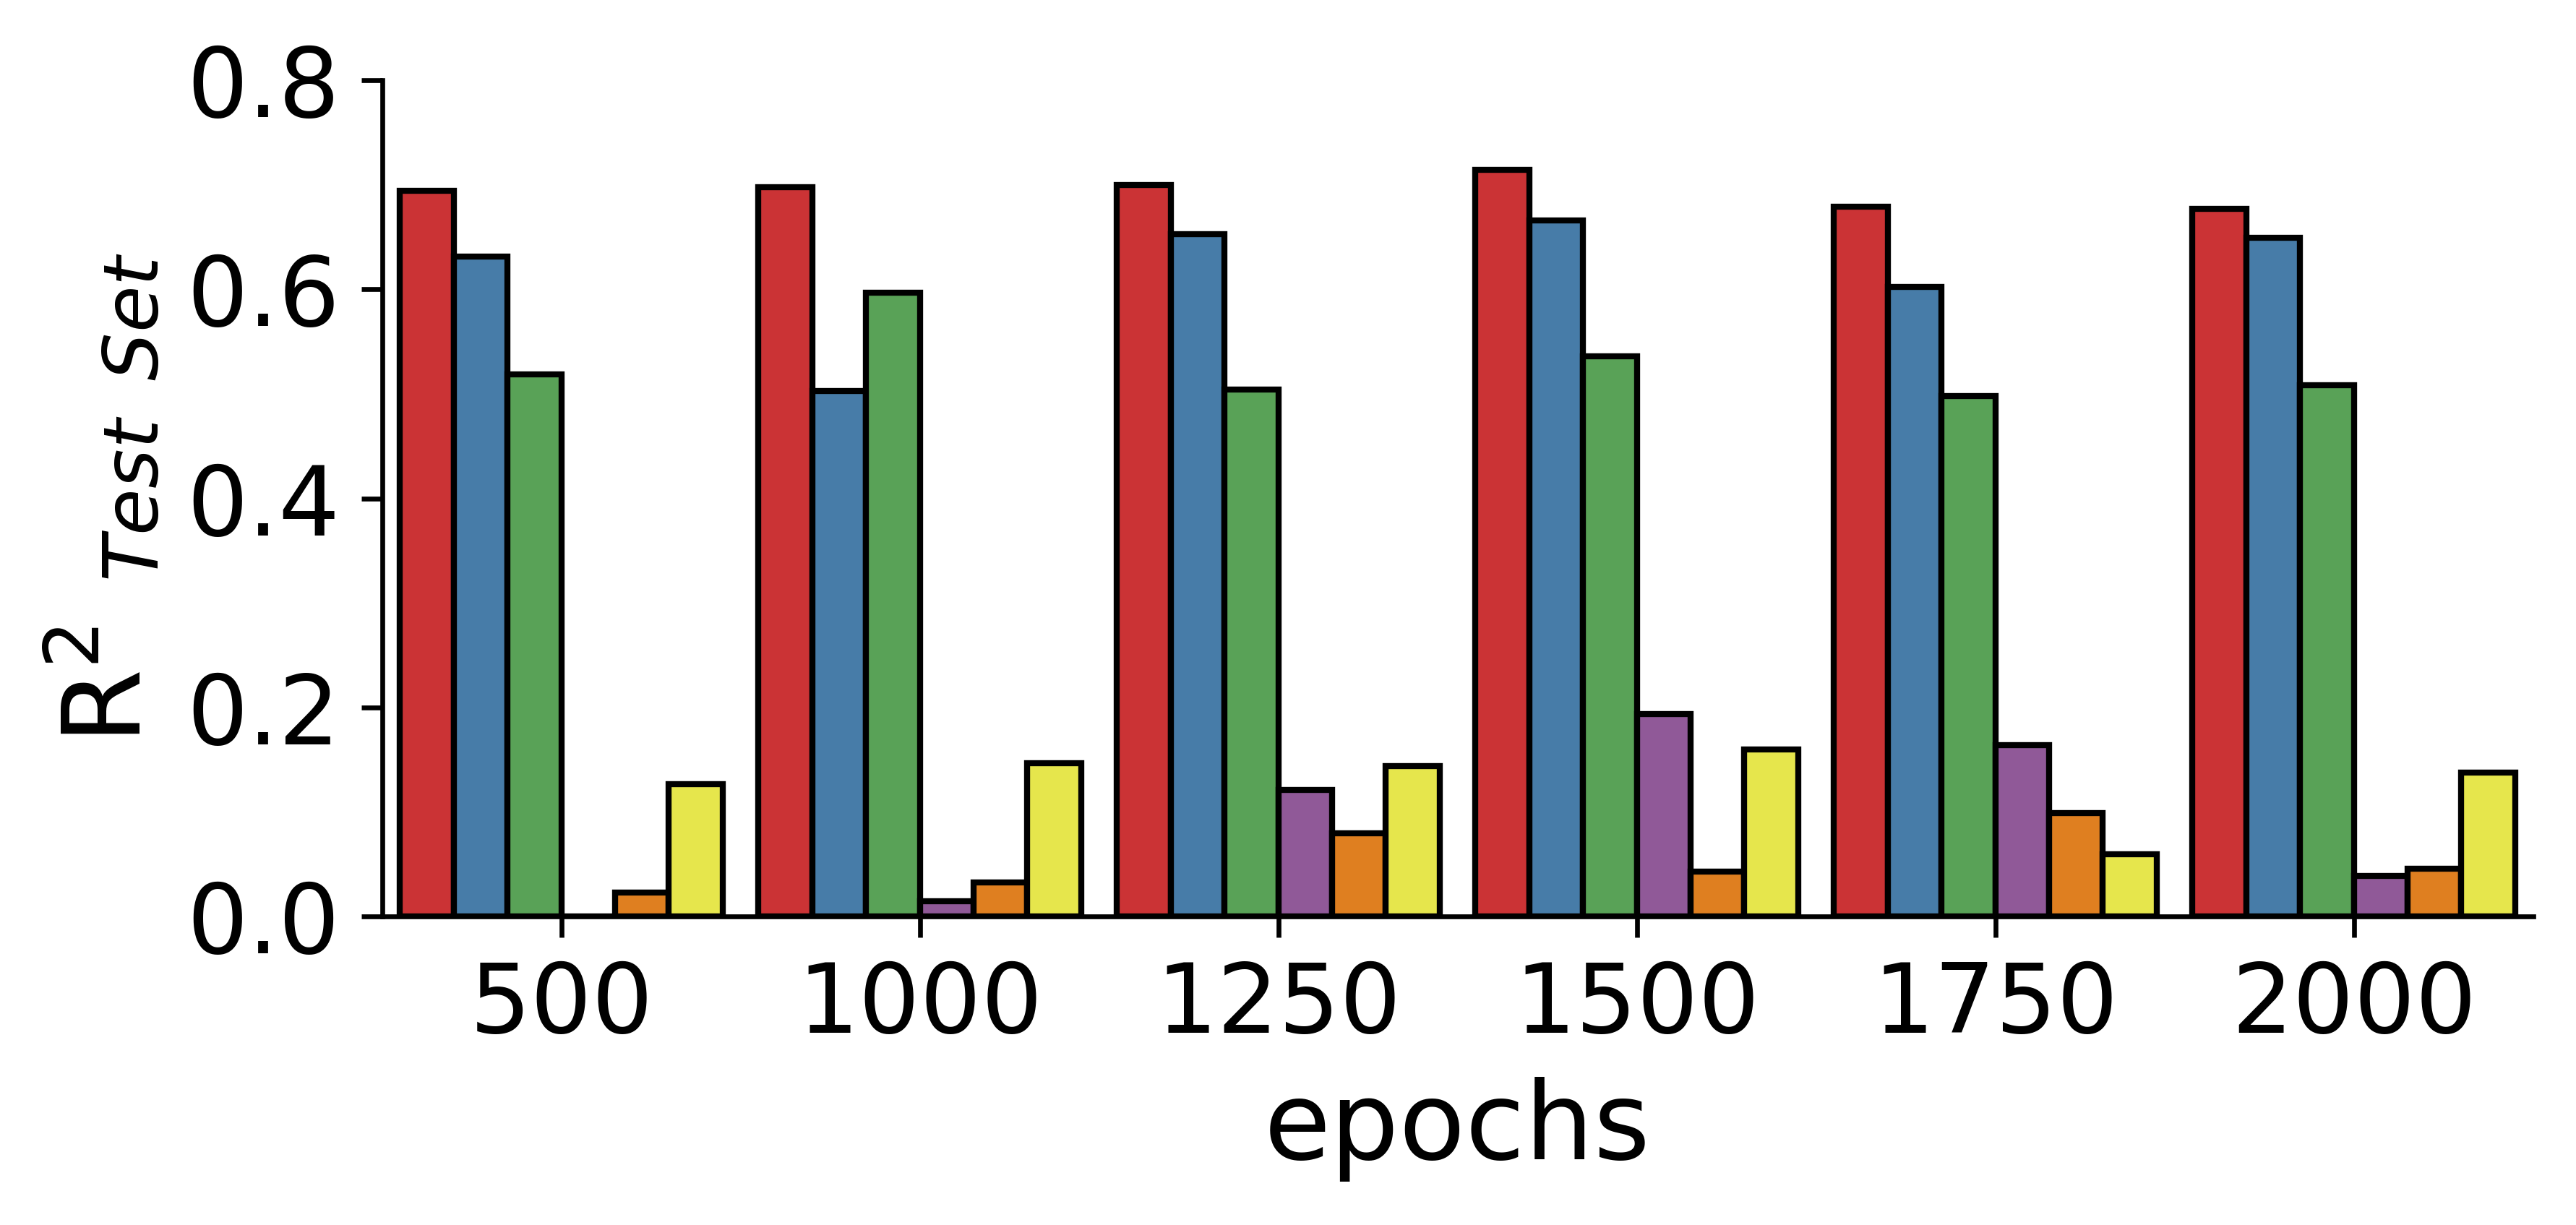

In [173]:
dl_performance = sns.barplot(data=dl_diagnostics, width=0.9,
                             x="epoch", y="r2", hue="Predictor",
                             palette="Set1", edgecolor="black")
dl_performance.set_xticklabels(dl_performance.get_xticklabels(), rotation=0, fontsize=16)
#dl_performance.set_yticklabels(dl_performance.get_yticklabels(), rotation=0, fontsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
dl_performance.set_yticks((0,0.2,0.4,0.6,0.8))
dl_performance.set_xlabel("epochs", fontsize=18)
dl_performance.set_ylabel("R$^2$ $_{Test}$ $_{Set}$", fontsize=18)
dl_performance.legend_.remove()
dl_performance.set_box_aspect(14/len(dl_performance.patches))

sns.despine()

In [220]:
ml_diagnostics = pd.read_excel("./tm_diagnostics/diagnostics_ML.xlsx")
ml_diagnostics.head()

Predictor    model  mae_cv  mae_test    rmse     r2
0   ESM_15B  XGBoost    5.35     5.598   7.120  0.547
1   ESM_15B       RF    5.10     5.472   7.116  0.548
2   ESM_15B      SVM    7.35     8.059   9.492  0.195
3   ESM_15B    LASSO    8.27     9.067  10.588  0.000
4    ESM_3B  XGBoost    5.46     5.597   7.438  0.506

C:\Users\jalvarez\AppData\Local\Temp\3\ipykernel_5308\1898919163.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ml_performance.set_yticklabels(ml_performance.get_yticklabels(), rotation=0, fontsize=16)


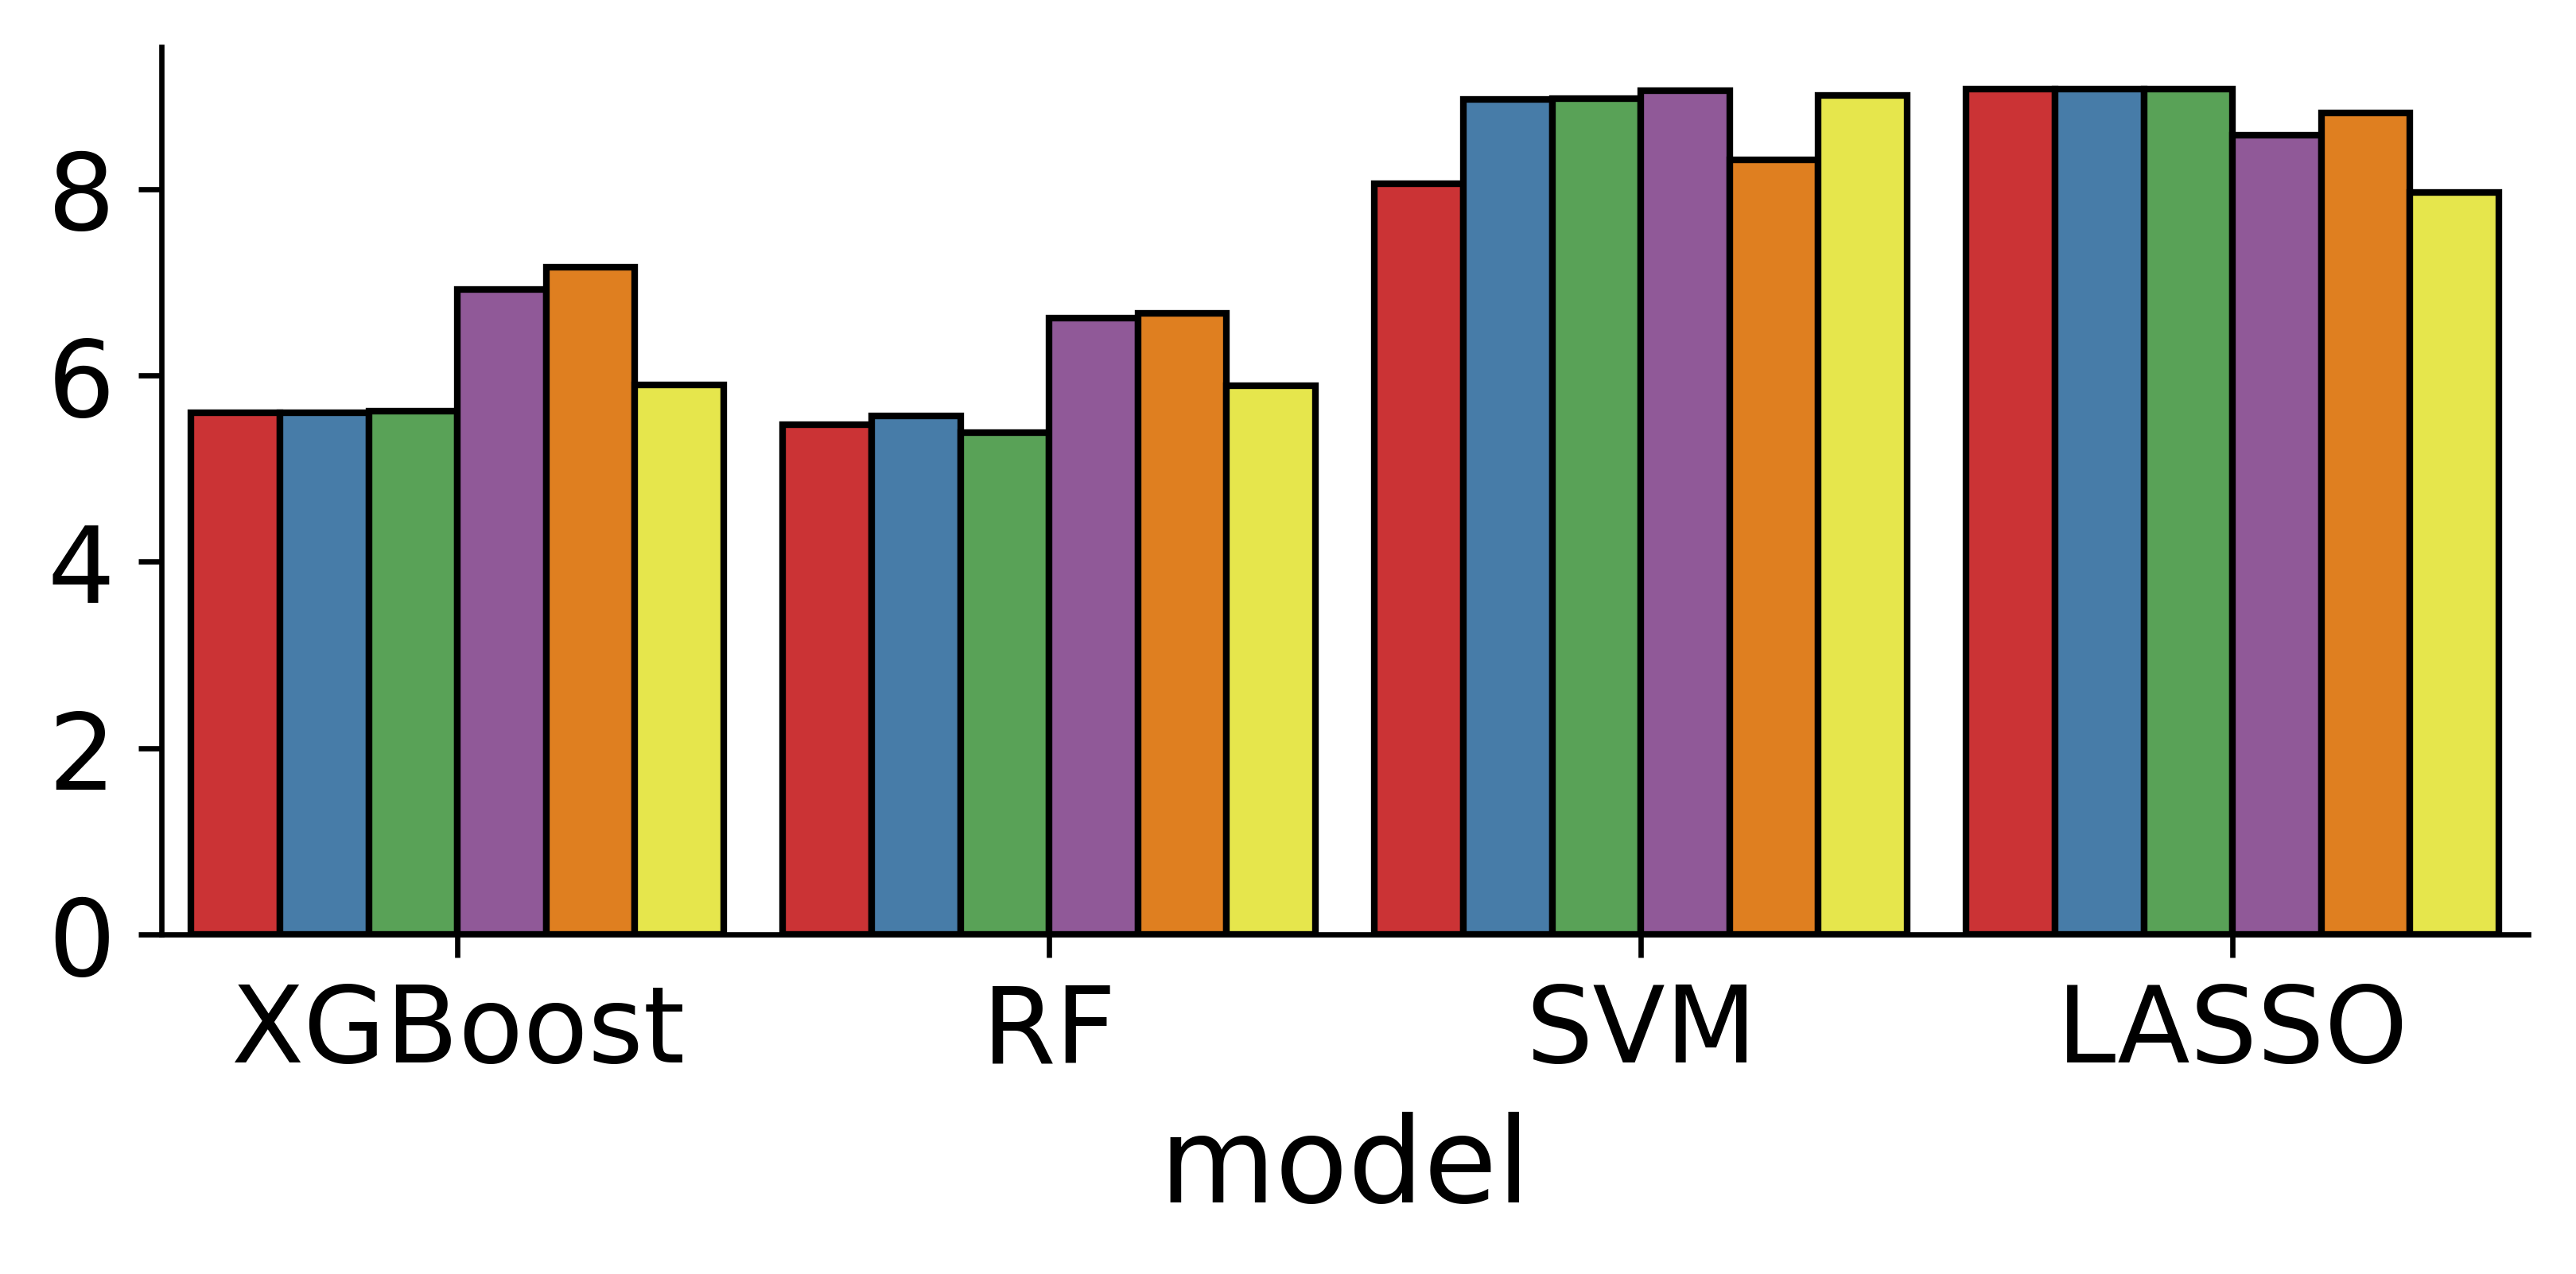

In [217]:
ml_performance = sns.barplot(data=ml_diagnostics, width=0.9,
                             x="model", y="mae_test", hue="Predictor",
                             palette="Set1", edgecolor="black")
ml_performance.set_xticklabels(ml_performance.get_xticklabels(), rotation=0, fontsize=16)
ml_performance.set_yticklabels(ml_performance.get_yticklabels(), rotation=0, fontsize=16)
ml_performance.set_xlabel("model", fontsize=18)
#ml_performance.set_ylabel("MAE $_{Test}$ $_{Set}$ (°C)", fontsize=18)
#ml_performance.set_title("ML Perfomance", fontsize=22, pad=70, loc='left')
plt.ylabel("")
ml_performance.legend_.remove()
ml_performance.set_box_aspect(9/len(ml_performance.patches))

sns.despine()

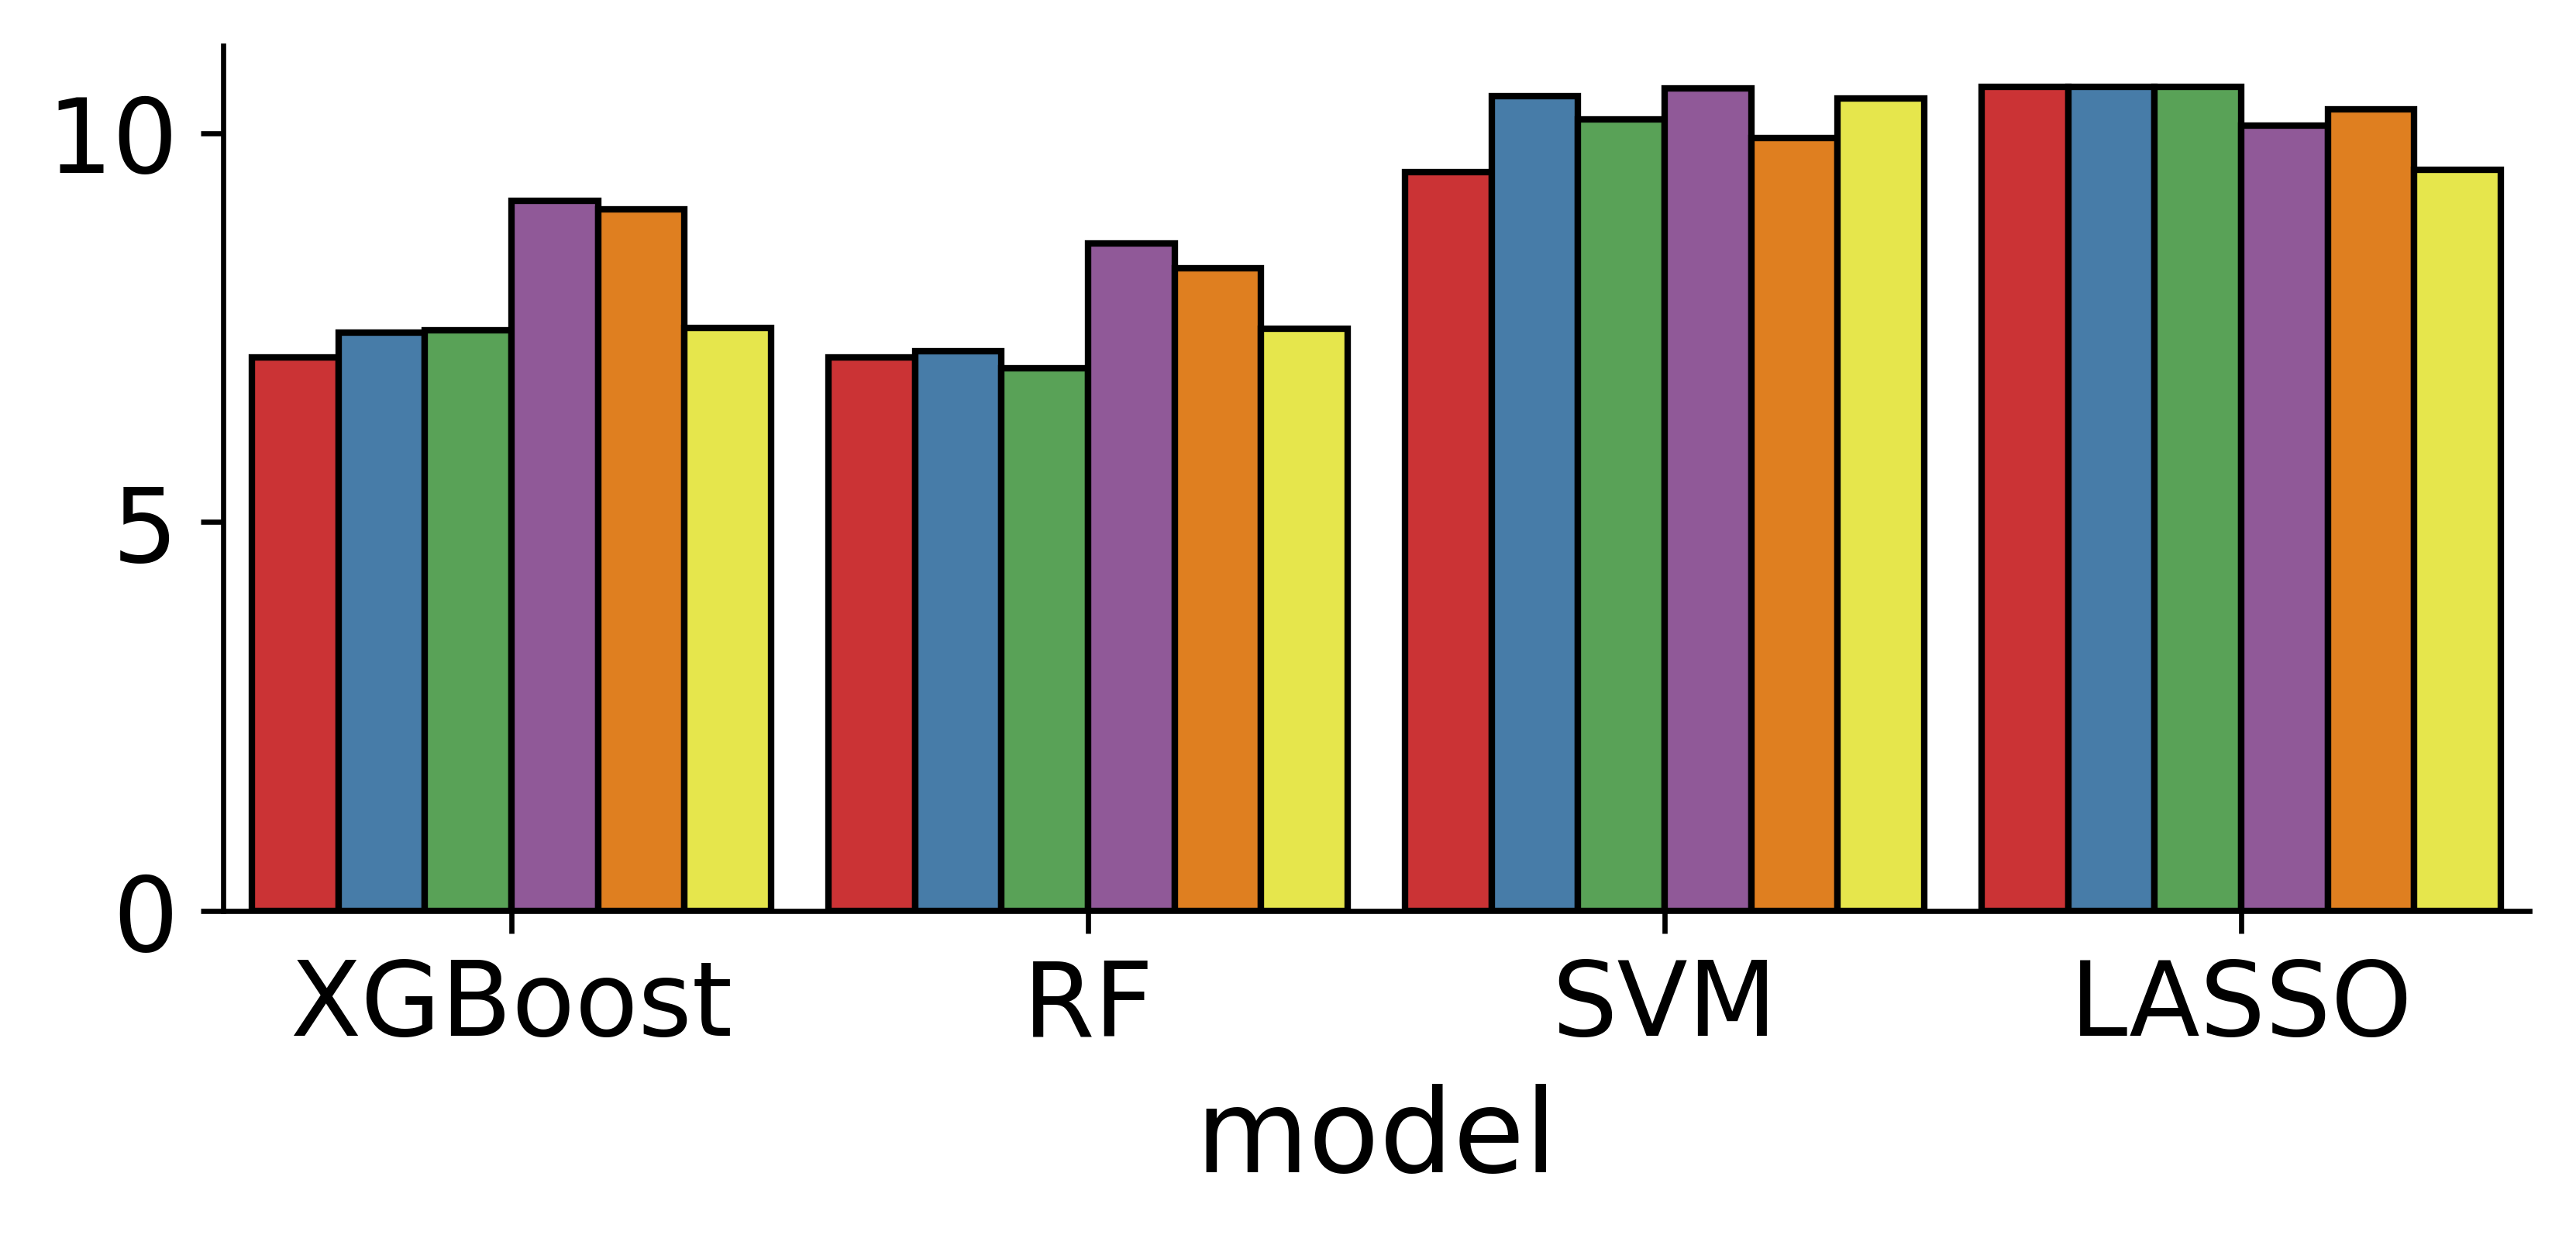

In [219]:
ml_performance = sns.barplot(data=ml_diagnostics, width=0.9,
                             x="model", y="rmse", hue="Predictor",
                             palette="Set1", edgecolor="black")
ml_performance.set_xticklabels(ml_performance.get_xticklabels(), rotation=0, fontsize=16)
#ml_performance.set_yticklabels(ml_performance.get_yticklabels(), rotation=0, fontsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
dl_performance.set_yticks((0,5,10))
ml_performance.set_xlabel("model", fontsize=18)
#ml_performance.set_ylabel("RMSE $_{Test}$ $_{Set}$ (°C)", fontsize=14)
plt.ylabel("")
ml_performance.legend_.remove()
ml_performance.set_box_aspect(9/len(ml_performance.patches))

sns.despine()

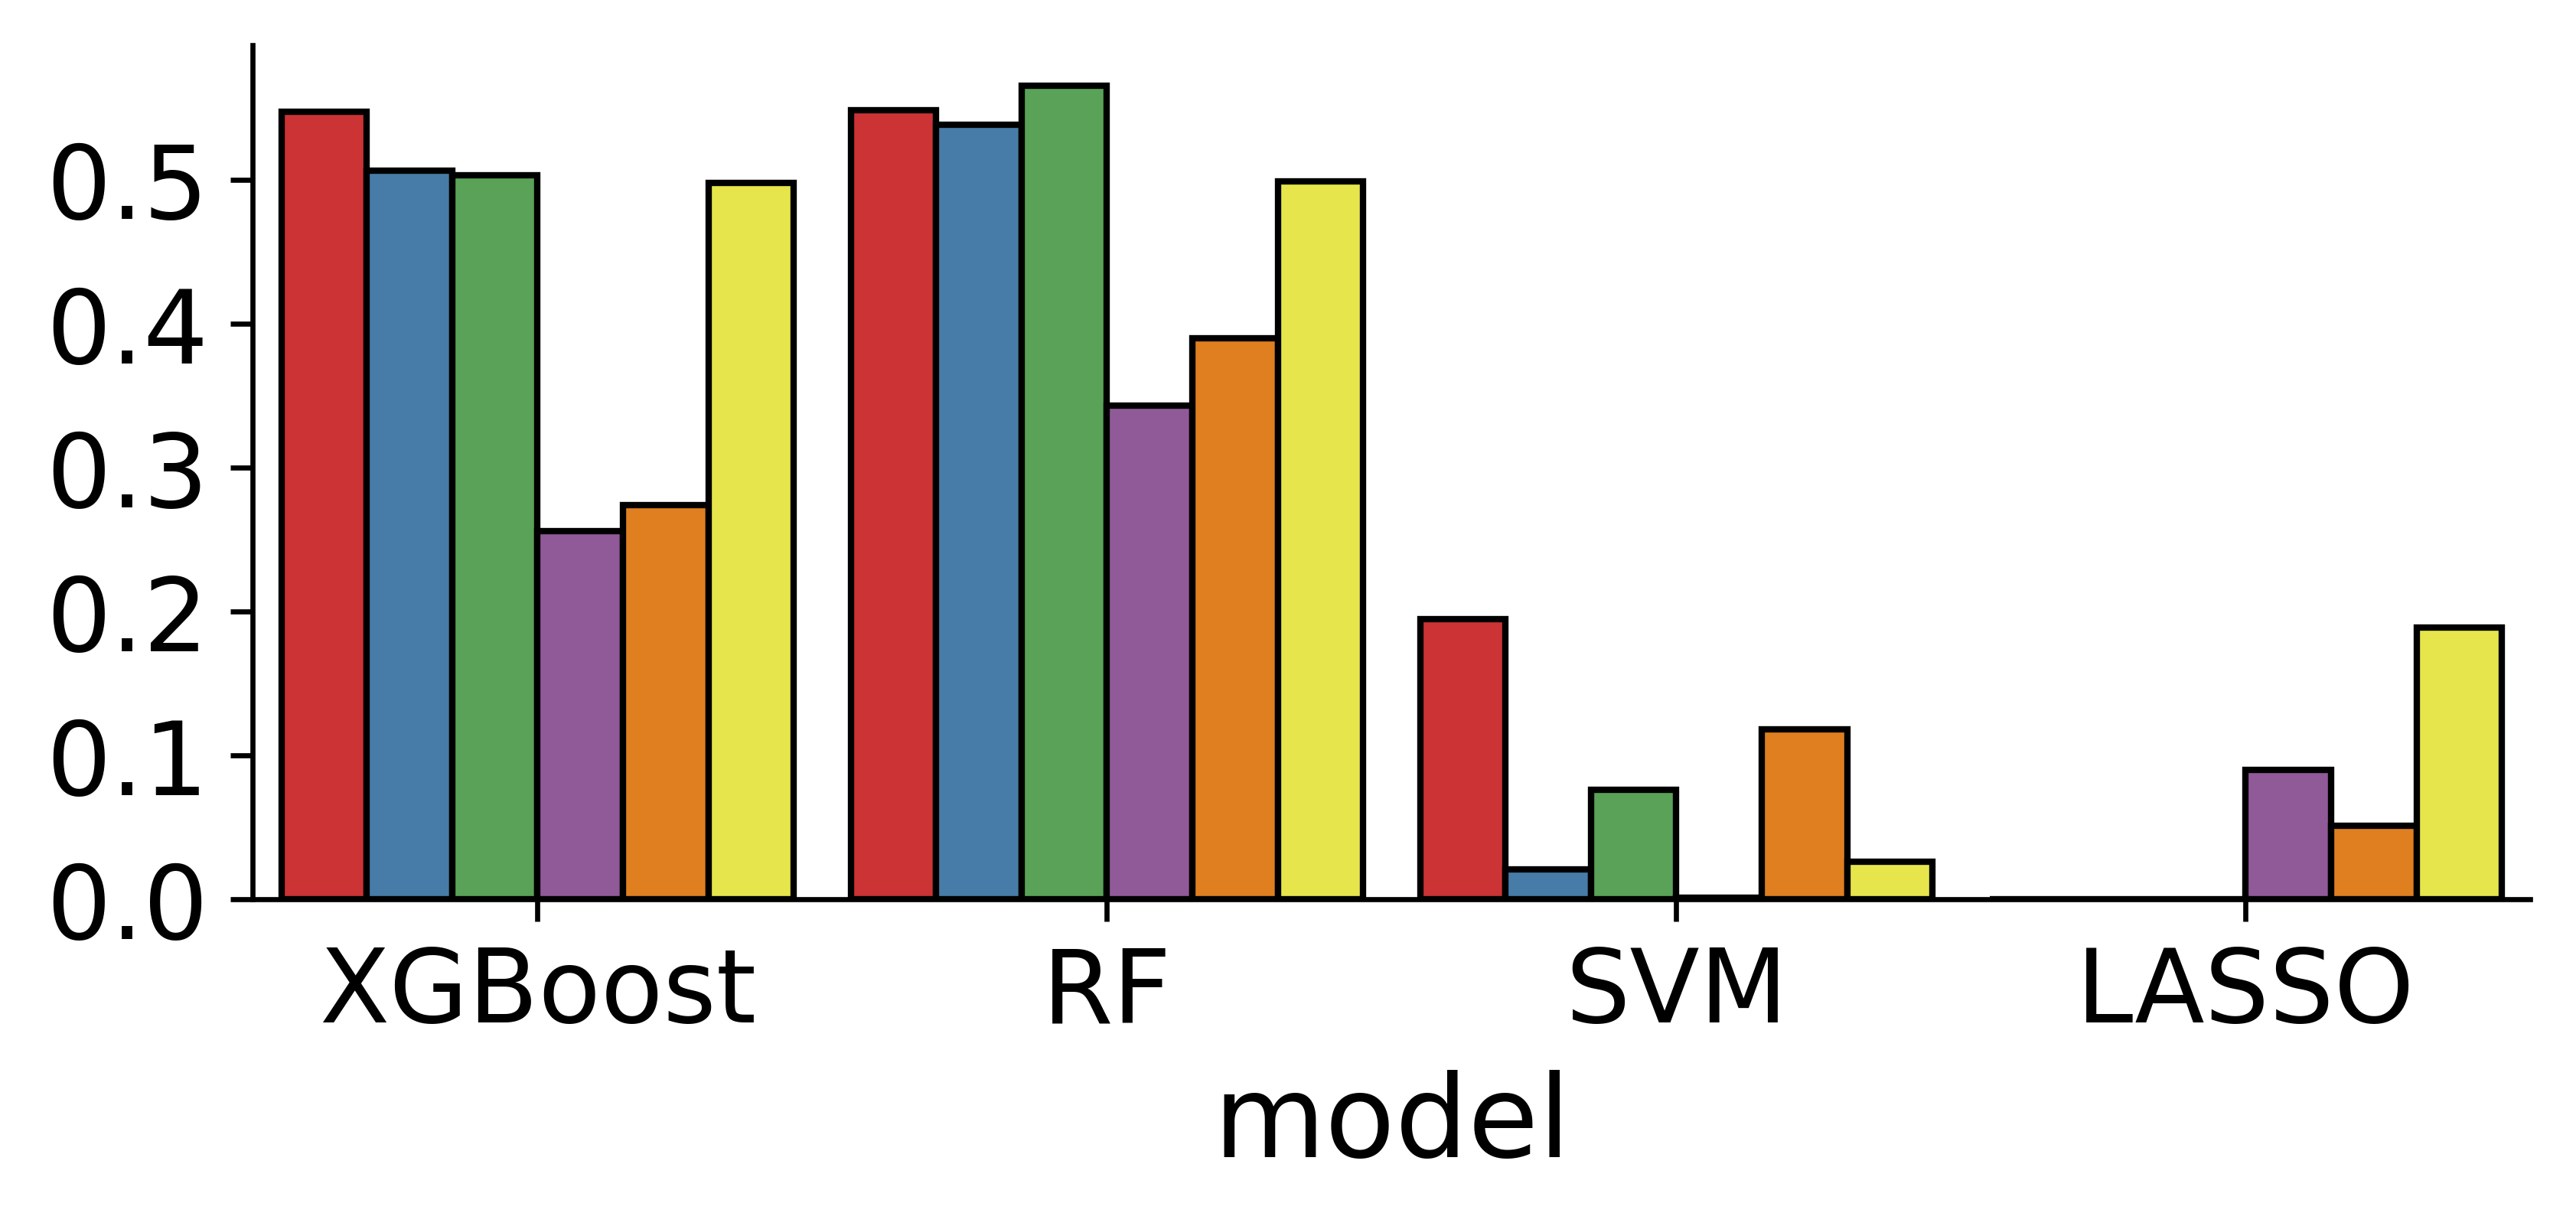

In [223]:
ml_performance = sns.barplot(data=ml_diagnostics, width=0.9,
                             x="model", y="r2", hue="Predictor",
                             palette="Set1", edgecolor="black")
ml_performance.set_xticklabels(ml_performance.get_xticklabels(), rotation=0, fontsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ml_performance.set_yticks((0,0.1,0.2,0.3,0.4,0.5))
ml_performance.set_xlabel("model", fontsize=18)
#ml_performance.set_ylabel("R$^2$ $_{Test}$ $_{Set}$", fontsize=18)
plt.ylabel("")
ml_performance.legend_.remove()
ml_performance.set_box_aspect(9/len(ml_performance.patches))

sns.despine()

## Combination Comparisons

In [88]:
combined_diagnostics = pd.read_excel("./tm_diagnostics/diagnostics_DL_combined.xlsx")
combined_diagnostics.head()

Combined Predictors metric  value
0  AF2 pLDDT, NetSurfP3,\nPhysicochemical Charact...    mae  7.958
1  AF2 pLDDT, NetSurfP3,\nPhysicochemical Charact...   rmse  9.573
2  AF2 pLDDT, NetSurfP3,\nPhysicochemical Charact...     r2  0.181
3  ESM_15B, AF2 pLDDT, NetSurfP3,\nPhysicochemica...    mae  5.678
4  ESM_15B, AF2 pLDDT, NetSurfP3,\nPhysicochemica...   rmse  7.484

C:\Users\jalvarez\AppData\Local\Temp\1\ipykernel_17776\238160622.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  combined1_performance.set_yticklabels(combined1_performance.get_yticklabels(), rotation=0, fontsize=16)


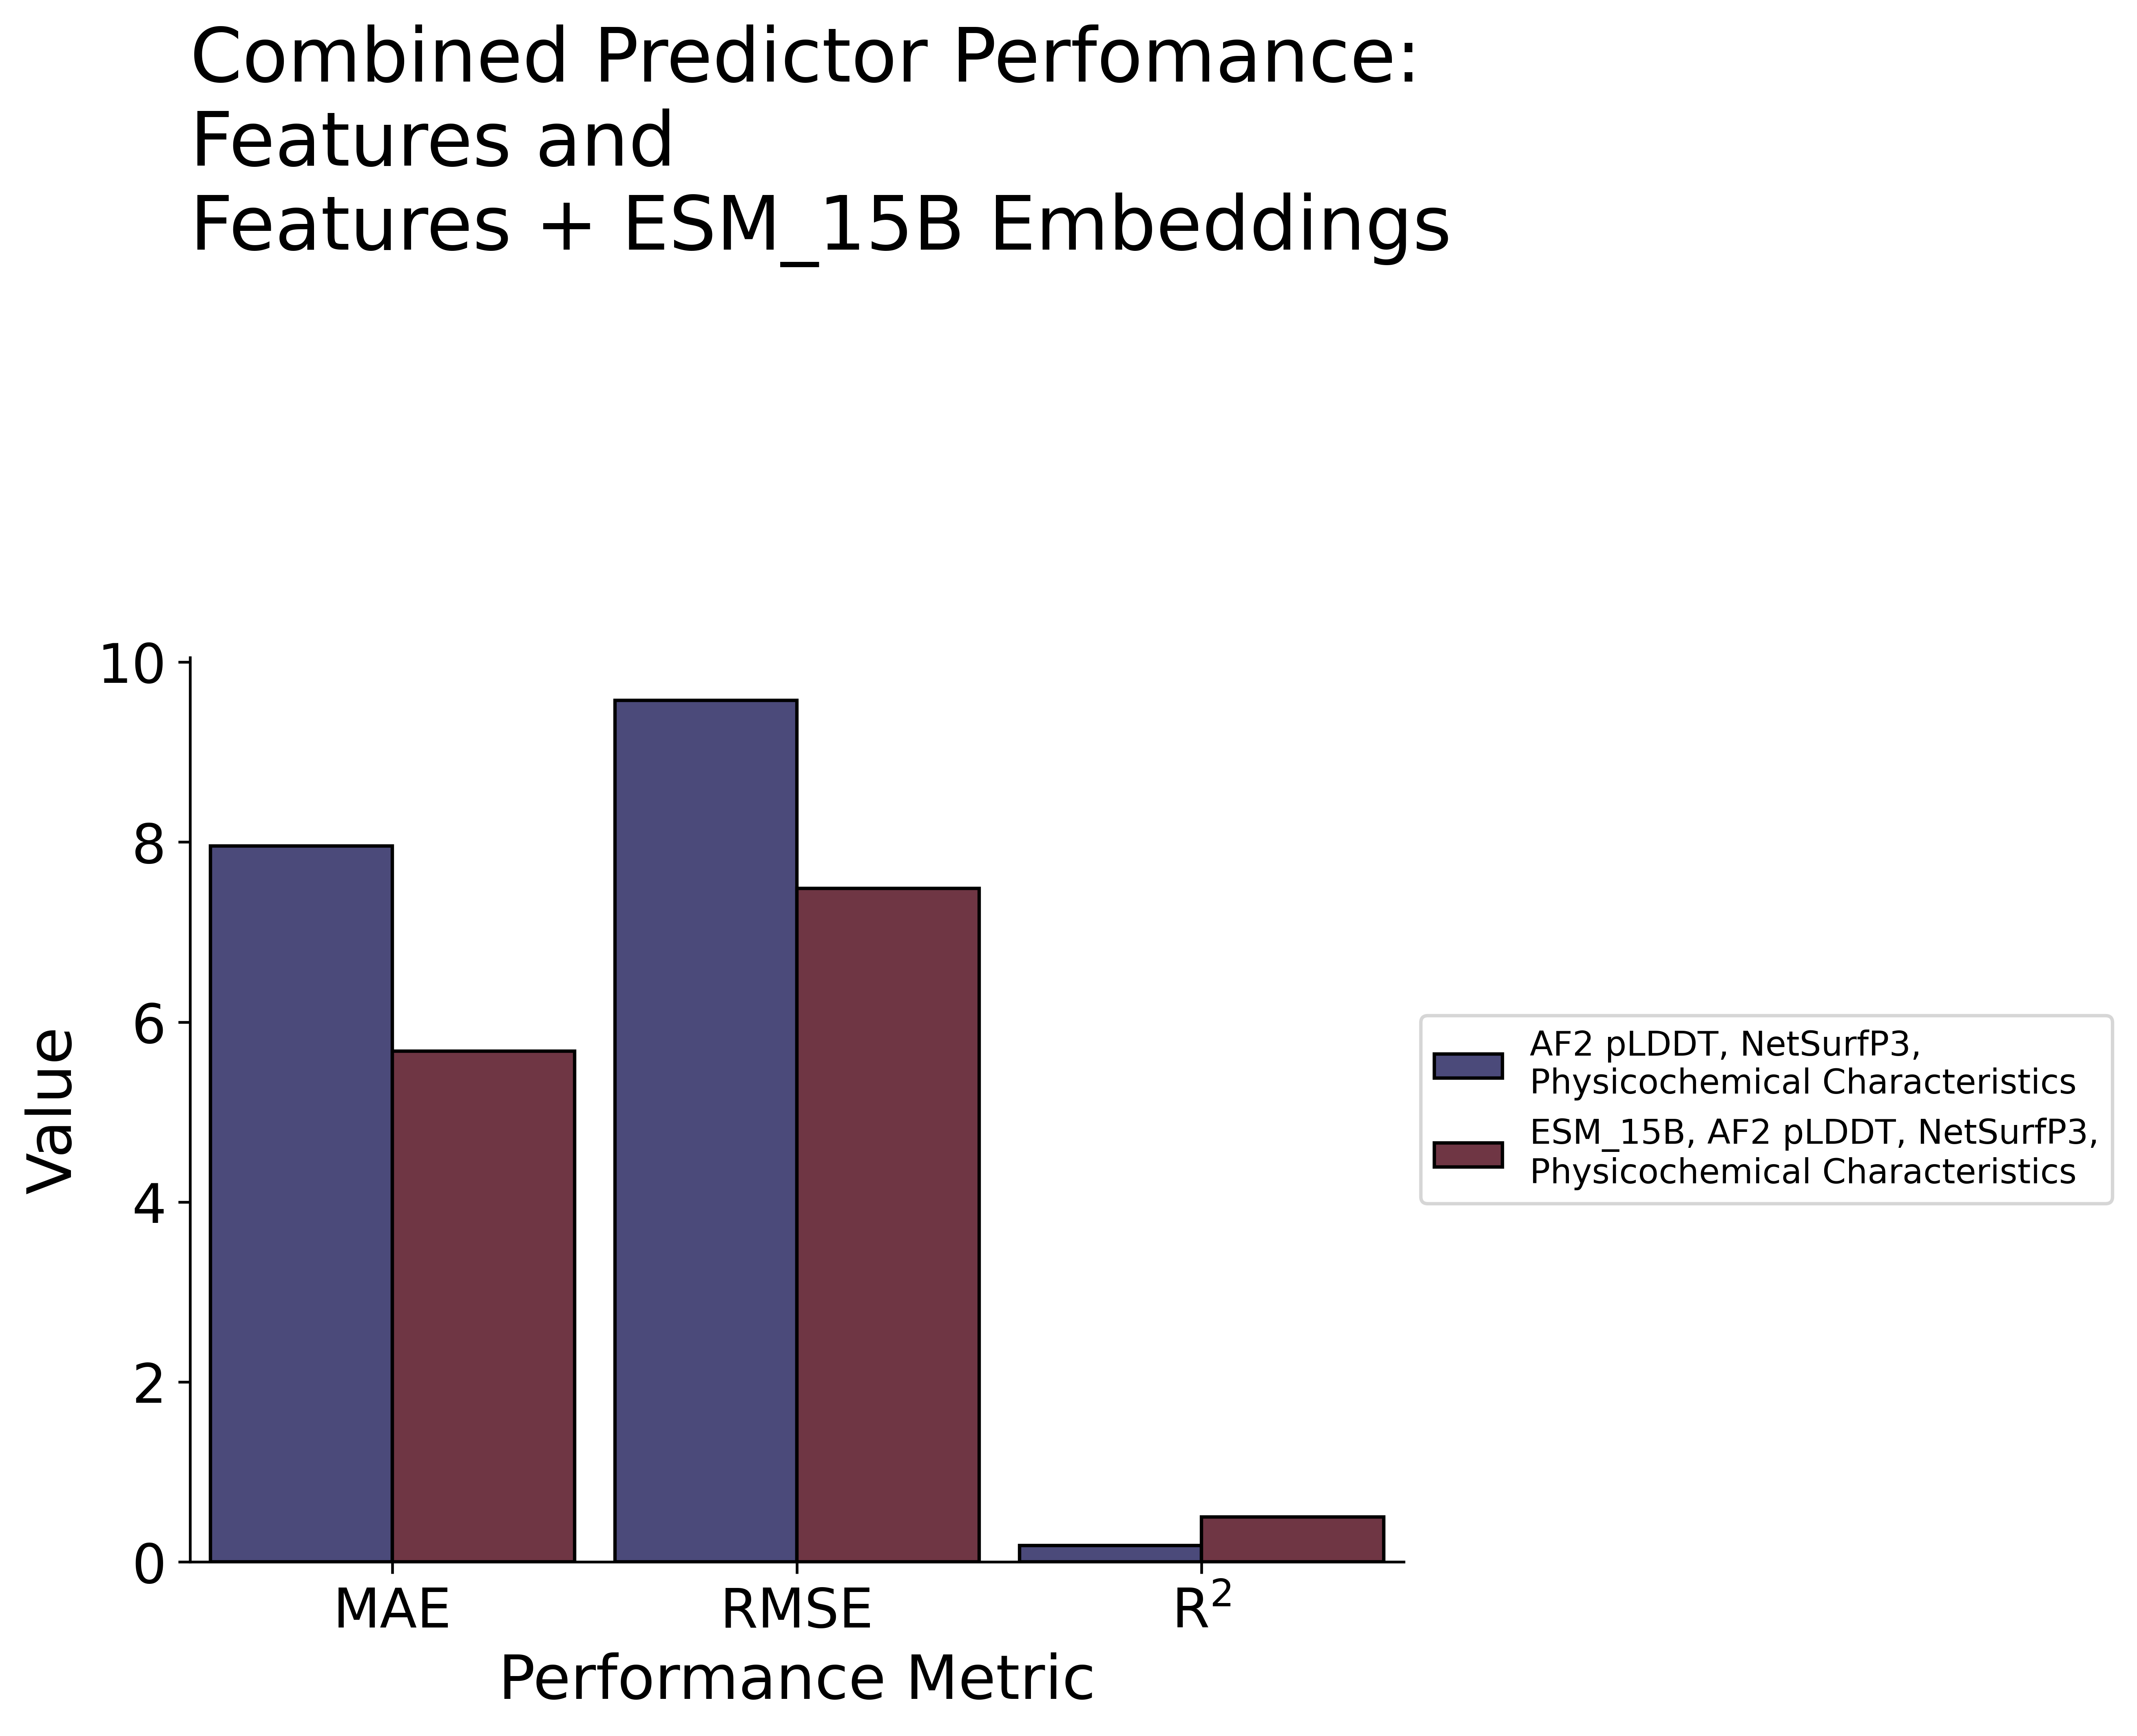

In [90]:
#combined1_performance = sns.barplot(data=combined_diagnostics.iloc[0:6,:], width=0.9, ### row 0:6
combined1_performance = sns.barplot(data=combined_diagnostics.iloc[6:,:], width=0.9, ### row 6 and beyond
                             x="metric", y="value", hue="Combined Predictors",
                             palette="icefire", edgecolor="black")
                             #palette="hsv", edgecolor="black")
combined1_performance.set_xticklabels((["MAE", "RMSE", "R$^2$"]), rotation=0, fontsize=16)
combined1_performance.set_yticklabels(combined1_performance.get_yticklabels(), rotation=0, fontsize=16)
combined1_performance.set_xlabel("Performance Metric", fontsize=18)
combined1_performance.set_ylabel("Value", fontsize=18)
## Title for rows 0:6
combined1_performance.set_title("Combined Predictor Perfomance:\nFeatures and\nFeatures + ESM_15B Embeddings", fontsize=22, pad=120, loc='left')
## Title for rows 6:
#combined1_performance.set_title("Combined Predictor Perfomance:\nESM_15B Embeddings + \nEach Feature", fontsize=22, pad=120, loc='left')
combined1_performance.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#combined1_performance.legend_.remove()

sns.despine()